<a href="https://colab.research.google.com/github/zakariazemmahi/desktop-tutorial/blob/main/ETH_to_BTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 76.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 15.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import  matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from statsmodels.tsa.stattools import adfuller,kpss
from statsmodels.tsa.arima.model import ARIMA


In [ ]:
pip install requests

Bitcoin Data:
        time     high      low     open  volumefrom      volumeto    close  \
0 2019-10-18  8157.36  7850.66  8082.46    27732.54  2.210659e+08  7972.62   
1 2019-10-19  8108.69  7919.05  7972.62    17875.39  1.432024e+08  7973.63   
2 2019-10-20  8326.13  7911.49  7973.63    25287.68  2.053943e+08  8247.25   
3 2019-10-21  8359.52  8177.11  8247.25    22831.65  1.885115e+08  8223.25   
4 2019-10-22  8318.41  8021.36  8223.25    24453.79  2.005939e+08  8034.50   

  conversionType conversionSymbol  
0         direct                   
1         direct                   
2         direct                   
3         direct                   
4         direct                   
Ethereum Data:
        time    high     low    open  volumefrom      volumeto   close  \
0 2019-10-18  175.72  171.73  177.41  1687411.38  2.926047e+08  173.40   
1 2019-10-19  174.94  170.80  173.40  1290858.94  2.224281e+08  172.31   
2 2019-10-20  178.88  175.01  172.31  1429636.02  2.513749e+08  

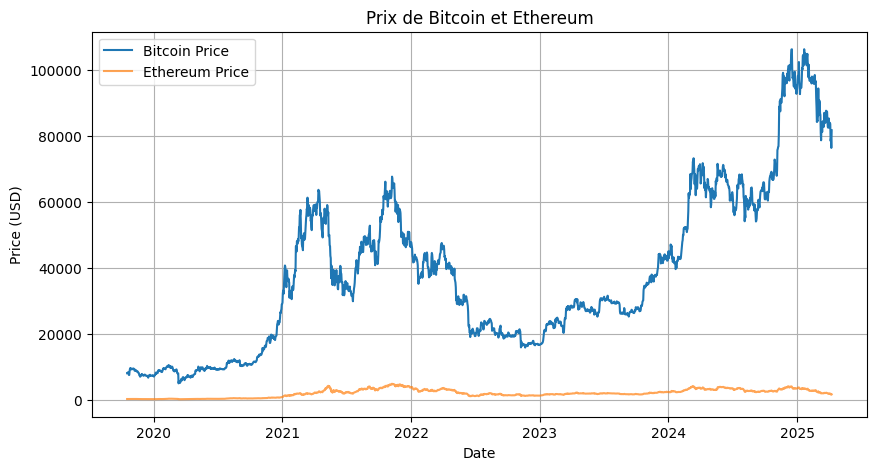

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import time

# Fonction pour récupérer les données historiques de CryptoCompare
def collect_data_crypto_compare(crypto_symbol, start_timestamp, end_timestamp):
    url = f'https://min-api.cryptocompare.com/data/v2/histoday'
    params = {
        'fsym': crypto_symbol,  # Symbole de la cryptomonnaie (BTC ou ETH)
        'tsym': 'USD',  # Devise de comparaison
        'limit': 2000,  # Limite des jours à récupérer
        'toTs': end_timestamp,  # Timestamp de fin
        'extraParams': 'crypto_prediction'  # Paramètre optionnel pour l'identification de l'application
    }
    response = requests.get(url, params=params)

    if response.status_code == 200:
        data = response.json()['Data']['Data']
        df = pd.DataFrame(data)

        # Convertir les timestamps en dates lisibles
        df['time'] = pd.to_datetime(df['time'], unit='s')

        return df
    else:
        print(f"Erreur lors de la récupération des données: {response.status_code}")
        return None

# Obtenir la date d'aujourd'hui sous forme de timestamp
today = datetime.today()
end_timestamp = int(time.mktime(today.timetuple()))

# Exemple de timestamp pour début (en secondes)
start_timestamp = 1614556800  # (par exemple, début de l'année 2021)

# Collecter les données de Bitcoin et Ethereum
bitcoin_data = collect_data_crypto_compare('BTC', start_timestamp, end_timestamp)
ethereum_data = collect_data_crypto_compare('ETH', start_timestamp, end_timestamp)

# Vérification que les données ont été récupérées correctement
if bitcoin_data is not None:
    print("Bitcoin Data:")
    print(bitcoin_data.head())

if ethereum_data is not None:
    print("Ethereum Data:")
    print(ethereum_data.head())

# Tracer les prix de Bitcoin et Ethereum
plt.figure(figsize=(10, 5))
plt.plot(bitcoin_data['time'], bitcoin_data['close'], label='Bitcoin Price')
plt.plot(ethereum_data['time'], ethereum_data['close'], label='Ethereum Price', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Prix de Bitcoin et Ethereum')
plt.legend()
plt.grid(True)
plt.show()


###Analyse de la corrélation :

In [ ]:
!pip install tabulate


Vérification de la volatilité moyenne sur 30 jours:
Volatilité BTC: 3.12
Volatilité ETH: 4.02

Statistiques Comparatives:
|                               |   Bitcoin |   Ethereum |
|:------------------------------|----------:|-----------:|
| Moyenne (USD)                 |  38021.66 |    1943.71 |
| Médiane (USD)                 |  33088.51 |    1871.76 |
| Écart-type (USD)              |  24348.92 |    1167.24 |
| Volatilité (rendement %)      |      3.37 |       4.37 |
| Rendement moyen quotidien (%) |      0.17 |       0.21 |
| Skewness des rendements       |     -0.44 |      -0.26 |
| Kurtosis des rendements       |     10.97 |       8.76 |
| Corrélation BTC/ETH           |      0.82 |       0.82 |
| Max Drawdown (%)              |    -76.67 |     -79.33 |
| Rendement annualisé (%)       |     88.76 |     113.62 |


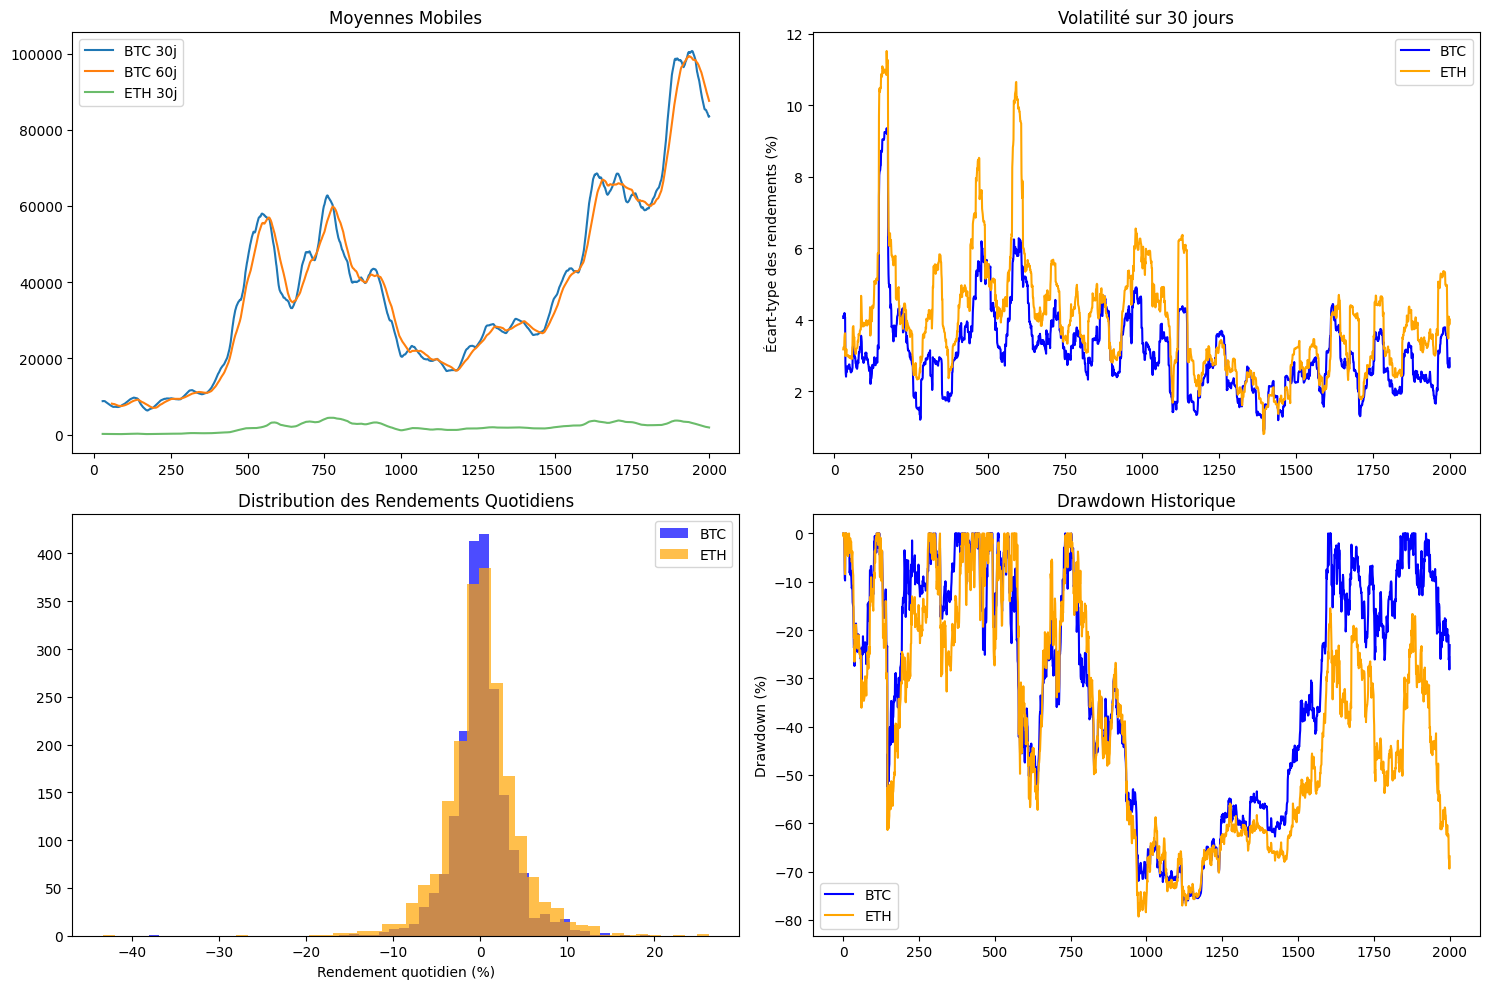

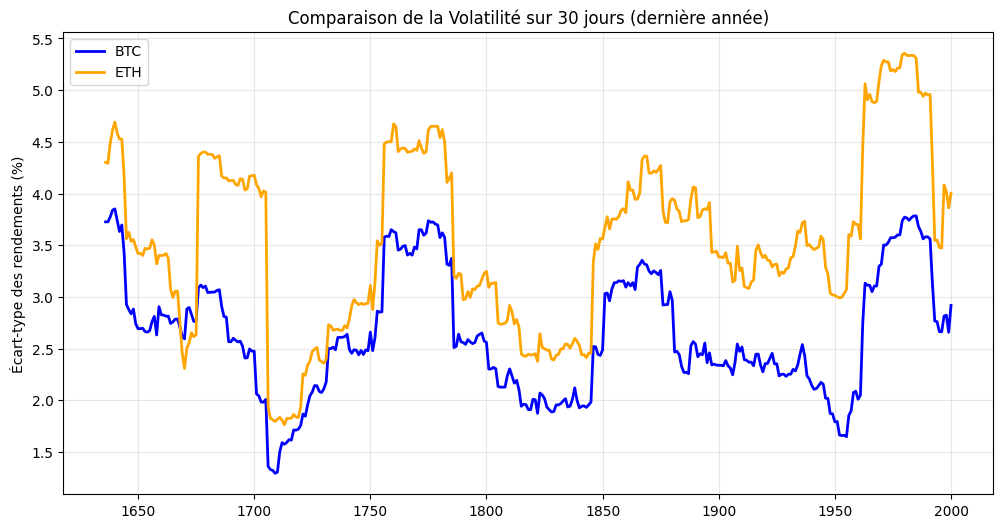

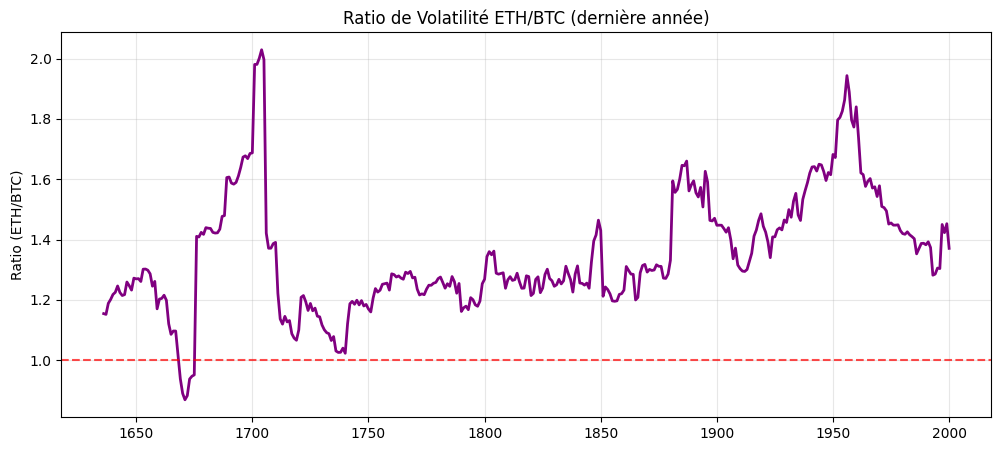


Ratio de volatilité moyen ETH/BTC: 1.29
Un ratio > 1 indique que ETH est plus volatil que BTC


In [ ]:
# =================================================================
# ANALYSE STATISTIQUE AVANCÉE
# =================================================================
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Supposons que bitcoin_data et ethereum_data sont déjà chargés
# Si ce n'est pas le cas, ajoutez le code pour charger vos données ici

def calculate_statistics(df, crypto_name):
    """Calcule les statistiques avancées pour une cryptomonnaie"""
    # Création d'une copie pour éviter les avertissements de modification
    df = df.copy()

    # Calcul des rendements quotidiens
    df['daily_return'] = df['close'].pct_change() * 100

    # Statistiques descriptives
    stats = {
        'Moyenne (USD)': df['close'].mean(),
        'Médiane (USD)': df['close'].median(),
        'Écart-type (USD)': df['close'].std(),
        'Volatilité (rendement %)': df['daily_return'].std(),
        'Rendement moyen quotidien (%)': df['daily_return'].mean(),
        'Skewness des rendements': df['daily_return'].skew(),
        'Kurtosis des rendements': df['daily_return'].kurtosis(),
        'Corrélation BTC/ETH': None  # Rempli plus tard
    }

    # Calculs supplémentaires
    df['rolling_30'] = df['close'].rolling(window=30).mean()
    df['rolling_60'] = df['close'].rolling(window=60).mean()
    df['volatility_30'] = df['daily_return'].rolling(window=30).std()

    # Maximum Drawdown
    df['cumulative_max'] = df['close'].cummax()
    df['drawdown'] = (df['close'] - df['cumulative_max']) / df['cumulative_max'] * 100
    stats['Max Drawdown (%)'] = df['drawdown'].min()

    # Rendement annualisé
    annualized_return = (1 + df['daily_return'].mean()/100)**365 - 1
    stats['Rendement annualisé (%)'] = annualized_return * 100

    return stats, df

# Calcul pour les deux cryptomonnaies
btc_stats, bitcoin_data_processed = calculate_statistics(bitcoin_data, 'Bitcoin')
eth_stats, ethereum_data_processed = calculate_statistics(ethereum_data, 'Ethereum')

# Calcul de la corrélation
correlation = bitcoin_data_processed['daily_return'].corr(ethereum_data_processed['daily_return'])
btc_stats['Corrélation BTC/ETH'] = correlation
eth_stats['Corrélation BTC/ETH'] = correlation

# Vérification de la volatilité
print("\nVérification de la volatilité moyenne sur 30 jours:")
print(f"Volatilité BTC: {bitcoin_data_processed['volatility_30'].mean():.2f}")
print(f"Volatilité ETH: {ethereum_data_processed['volatility_30'].mean():.2f}")

# Création du DataFrame pour l'affichage
stats_df = pd.DataFrame([btc_stats, eth_stats], index=['Bitcoin', 'Ethereum'])
print("\nStatistiques Comparatives:")
print(stats_df.transpose().to_markdown(floatfmt=".2f"))

# =================================================================
# VISUALISATIONS COMPLÉMENTAIRES
# =================================================================

plt.figure(figsize=(15, 10))

# Moyennes mobiles
plt.subplot(2, 2, 1)
plt.plot(bitcoin_data_processed.index, bitcoin_data_processed['rolling_30'], label='BTC 30j')
plt.plot(bitcoin_data_processed.index, bitcoin_data_processed['rolling_60'], label='BTC 60j')
plt.plot(ethereum_data_processed.index, ethereum_data_processed['rolling_30'], label='ETH 30j', alpha=0.7)
plt.title('Moyennes Mobiles')
plt.legend()

# Volatilité - CORRECTION ICI
plt.subplot(2, 2, 2)
plt.plot(bitcoin_data_processed.index, bitcoin_data_processed['volatility_30'], label='BTC', color='blue')
plt.plot(ethereum_data_processed.index, ethereum_data_processed['volatility_30'], label='ETH', color='orange')
plt.title('Volatilité sur 30 jours')
plt.legend()
plt.ylabel('Écart-type des rendements (%)')

# Distribution des rendements
plt.subplot(2, 2, 3)
plt.hist(bitcoin_data_processed['daily_return'].dropna(), bins=50, alpha=0.7, label='BTC', color='blue')
plt.hist(ethereum_data_processed['daily_return'].dropna(), bins=50, alpha=0.7, label='ETH', color='orange')
plt.title('Distribution des Rendements Quotidiens')
plt.legend()
plt.xlabel('Rendement quotidien (%)')

# Drawdown
plt.subplot(2, 2, 4)
plt.plot(bitcoin_data_processed.index, bitcoin_data_processed['drawdown'], label='BTC', color='blue')
plt.plot(ethereum_data_processed.index, ethereum_data_processed['drawdown'], label='ETH', color='orange')
plt.title('Drawdown Historique')
plt.legend()
plt.ylabel('Drawdown (%)')

plt.tight_layout()
plt.savefig('crypto_analysis.png', dpi=300)
plt.show()

# Ajout d'une visualisation spécifique comparative de la volatilité
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_data_processed.index[-365:], bitcoin_data_processed['volatility_30'].tail(365), label='BTC', color='blue', linewidth=2)
plt.plot(ethereum_data_processed.index[-365:], ethereum_data_processed['volatility_30'].tail(365), label='ETH', color='orange', linewidth=2)
plt.title('Comparaison de la Volatilité sur 30 jours (dernière année)')
plt.legend()
plt.ylabel('Écart-type des rendements (%)')
plt.grid(True, alpha=0.3)
plt.savefig('volatility_comparison.png', dpi=300)
plt.show()

# Ratio de volatilité ETH/BTC (pour montrer combien ETH est plus volatil que BTC)
common_dates = bitcoin_data_processed.index.intersection(ethereum_data_processed.index)
btc_vol = bitcoin_data_processed.loc[common_dates, 'volatility_30']
eth_vol = ethereum_data_processed.loc[common_dates, 'volatility_30']
volatility_ratio = eth_vol / btc_vol

plt.figure(figsize=(12, 5))
plt.plot(common_dates[-365:], volatility_ratio.tail(365), color='purple', linewidth=2)
plt.axhline(y=1, color='r', linestyle='--', alpha=0.7)
plt.title('Ratio de Volatilité ETH/BTC (dernière année)')
plt.ylabel('Ratio (ETH/BTC)')
plt.grid(True, alpha=0.3)
plt.savefig('volatility_ratio.png', dpi=300)
plt.show()

print(f"\nRatio de volatilité moyen ETH/BTC: {volatility_ratio.mean():.2f}")
print(f"Un ratio > 1 indique que ETH est plus volatil que BTC")

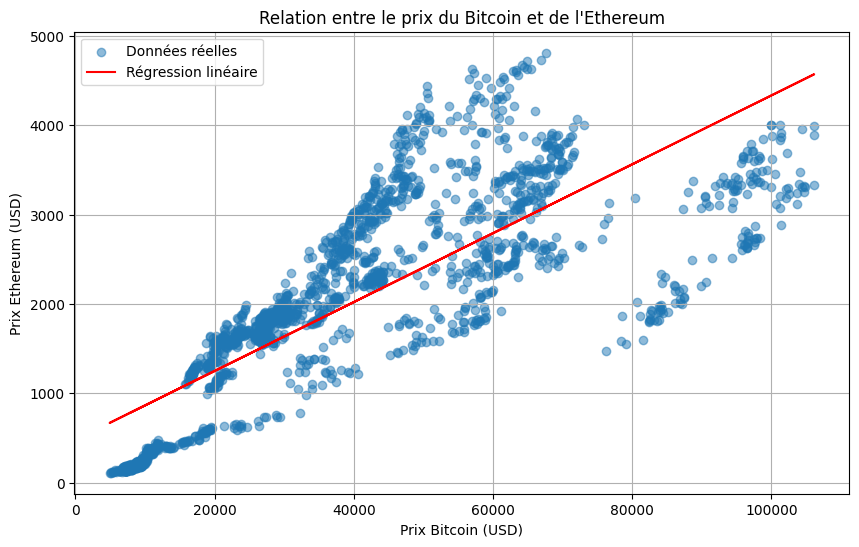

Coefficient de corrélation (pente): 0.0385
Intercept: 478.12


In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Copier les données récupérées et mettre 'time' comme index
btc = bitcoin_data.copy()
eth = ethereum_data.copy()
btc.set_index('time', inplace=True)
eth.set_index('time', inplace=True)

# Aligner les données sur les dates communes
common_index = btc.index.intersection(eth.index)
btc_prices = btc.loc[common_index]['close']
eth_prices = eth.loc[common_index]['close']

# Préparation des données pour le modèle
X = btc_prices.values.reshape(-1, 1)
y = eth_prices.values

# Régression linéaire
model = LinearRegression()
model.fit(X, y)
eth_pred = model.predict(X)

# Affichage du graphique
plt.figure(figsize=(10, 6))
plt.scatter(btc_prices, eth_prices, alpha=0.5, label='Données réelles')
plt.plot(btc_prices, eth_pred, color='red', label='Régression linéaire')
plt.xlabel('Prix Bitcoin (USD)')
plt.ylabel('Prix Ethereum (USD)')
plt.title('Relation entre le prix du Bitcoin et de l\'Ethereum')
plt.legend()
plt.grid(True)
plt.show()

# Affichage des coefficients
print(f"Coefficient de corrélation (pente): {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.2f}")


<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

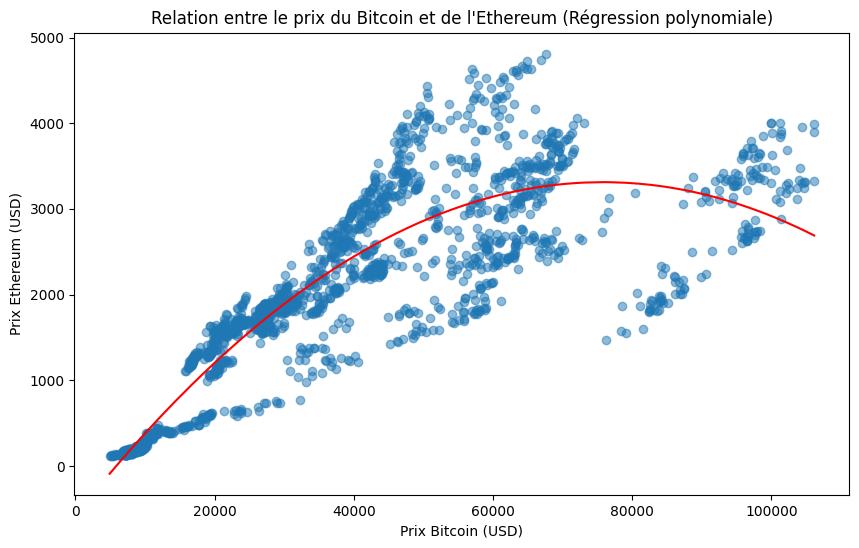

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# S'assurer que les données ont le bon index
btc = bitcoin_data.copy()
eth = ethereum_data.copy()
btc.set_index('time', inplace=True)
eth.set_index('time', inplace=True)

# Aligner les dates communes
common_index = btc.index.intersection(eth.index)
btc_prices = btc.loc[common_index]['close']
eth_prices = eth.loc[common_index]['close']

# Régression polynomiale (degré 2)
X = btc_prices.values.reshape(-1, 1)
y = eth_prices.values

poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X, y)
eth_pred_poly = poly_model.predict(X)

# Tri des données pour une courbe lisse
sorted_indices = np.argsort(X.flatten())
X_sorted = X[sorted_indices]
y_sorted = eth_pred_poly[sorted_indices]

# Affichage
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label='Données réelles')
plt.plot(X_sorted, y_sorted, color='red', label='Régression polynomiale')
plt.xlabel('Prix Bitcoin (USD)')
plt.ylabel('Prix Ethereum (USD)')
plt.title('Relation entre le prix du Bitcoin et de l\'Ethereum (Régression polynomiale)')
plt.legend


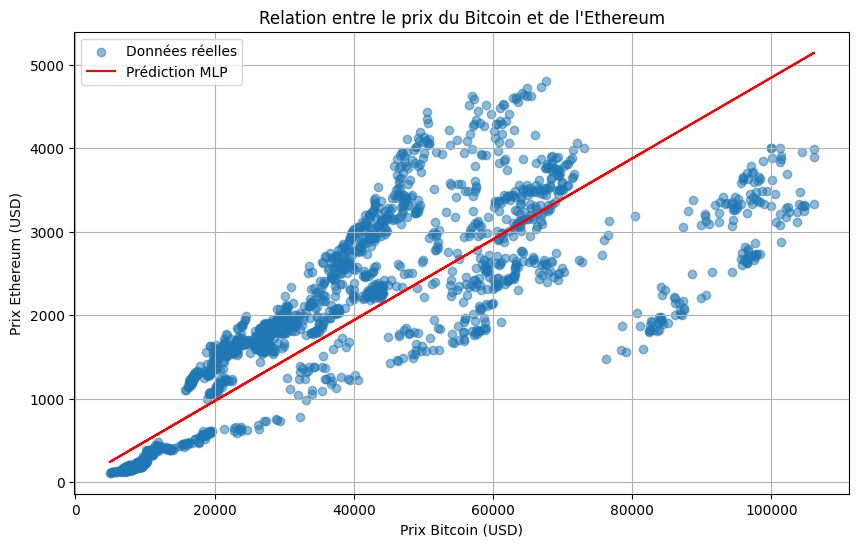

Coefficients du modèle (weights): [array([[-0.0084003 ,  0.1800353 , -0.26961297, -0.07055504, -0.17145101,
        -0.20770352, -0.14533368, -0.04439475, -0.01693144,  0.05379087,
        -0.00761885,  0.10027627, -0.13338353,  0.28677579, -0.25125766,
         0.14424529, -0.00829686,  0.06745106, -0.17567946, -0.13754885,
         0.17946717,  0.29438477, -0.06369627,  0.10525307,  0.2854261 ,
         0.29919753, -0.21258164, -0.24341621, -0.15617081,  0.23277524,
        -0.20368844, -0.00695652,  0.34217743, -0.00603705,  0.15889055,
        -0.06241247,  0.15519739,  0.20334435, -0.25737788,  0.19891362,
         0.36349517,  0.14345579, -0.08429962,  0.17164977, -0.2004299 ,
        -0.00078656,  0.2535869 , -0.07599953, -0.0796688 , -0.18256555]]), array([[-0.05563873],
       [ 0.04589703],
       [ 0.19320273],
       [-0.03765308],
       [ 0.20828763],
       [ 0.02701017],
       [-0.25903788],
       [ 0.22227699],
       [ 0.06635858],
       [ 0.36966394],
       [-0.1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

# Copier les données récupérées et mettre 'time' comme index
btc = bitcoin_data.copy()
eth = ethereum_data.copy()
btc.set_index('time', inplace=True)
eth.set_index('time', inplace=True)

# Aligner les données sur les dates communes
common_index = btc.index.intersection(eth.index)
btc_prices = btc.loc[common_index]['close']
eth_prices = eth.loc[common_index]['close']

# Préparation des données pour le modèle
X = btc_prices.values.reshape(-1, 1)
y = eth_prices.values

# Régression avec MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000, random_state=1)
model.fit(X, y)

# Prédictions
eth_pred = model.predict(X)

# Affichage du graphique
plt.figure(figsize=(10, 6))
plt.scatter(btc_prices, eth_prices, alpha=0.5, label='Données réelles')
plt.plot(btc_prices, eth_pred, color='red', label='Prédiction MLP')
plt.xlabel('Prix Bitcoin (USD)')
plt.ylabel('Prix Ethereum (USD)')
plt.title('Relation entre le prix du Bitcoin et de l\'Ethereum')
plt.legend()
plt.grid(True)
plt.show()

# Affichage des coefficients
print(f"Coefficients du modèle (weights): {model.coefs_}")
print(f"Intercept: {model.intercepts_}")


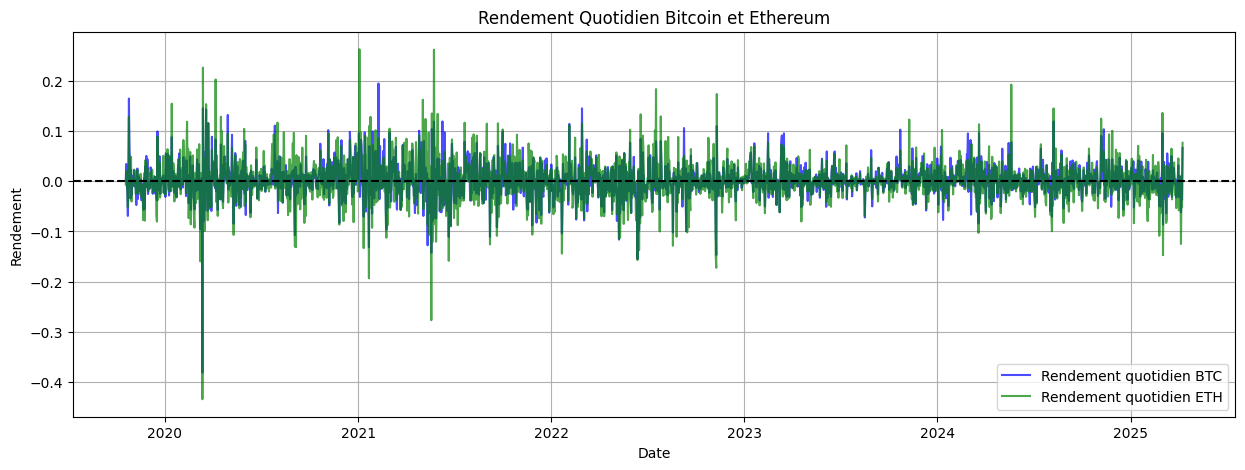

In [ ]:
# Paramètres : collecte des données
btc = collect_data_crypto_compare('BTC', start_timestamp, end_timestamp)
eth = collect_data_crypto_compare('ETH', start_timestamp, end_timestamp)

# Mise en forme
btc.set_index('time', inplace=True)
eth.set_index('time', inplace=True)

# Calcul du rendement quotidien basé sur la colonne 'close'
btc_returns = btc['close'].pct_change().dropna()
eth_returns = eth['close'].pct_change().dropna()

# Aligner les dates communes
common_index = btc_returns.index.intersection(eth_returns.index)
btc_returns = btc_returns.loc[common_index]
eth_returns = eth_returns.loc[common_index]

# Tracé du rendement quotidien
plt.figure(figsize=(15, 5))
plt.plot(btc_returns, label='Rendement quotidien BTC', color='blue', alpha=0.7)
plt.plot(eth_returns, label='Rendement quotidien ETH', color='green', alpha=0.7)
plt.title('Rendement Quotidien Bitcoin et Ethereum')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Rendement')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Comparaison des statistiques descriptives
descriptive_stats = pd.DataFrame({
    'BTC': [btc_returns.mean(), btc_returns.std()],
    'ETH': [eth_returns.mean(), eth_returns.std()]
}, index=['Moyenne', 'Écart-type'])
print("\n=== Statistiques descriptives des rendements ===")
print(descriptive_stats)


=== Statistiques descriptives des rendements ===
                 BTC       ETH
Moyenne     0.001740  0.002079
Écart-type  0.033717  0.043685


In [ ]:
# Calcul de la corrélation entre les prix de clôture de Bitcoin et Ethereum : Corrélation de Pearson :
correlation = bitcoin_data['close'].corr(ethereum_data['close'])
print(f"Corrélation entre Bitcoin et Ethereum : {correlation}")


Corrélation entre Bitcoin et Ethereum : 0.8040819423148409


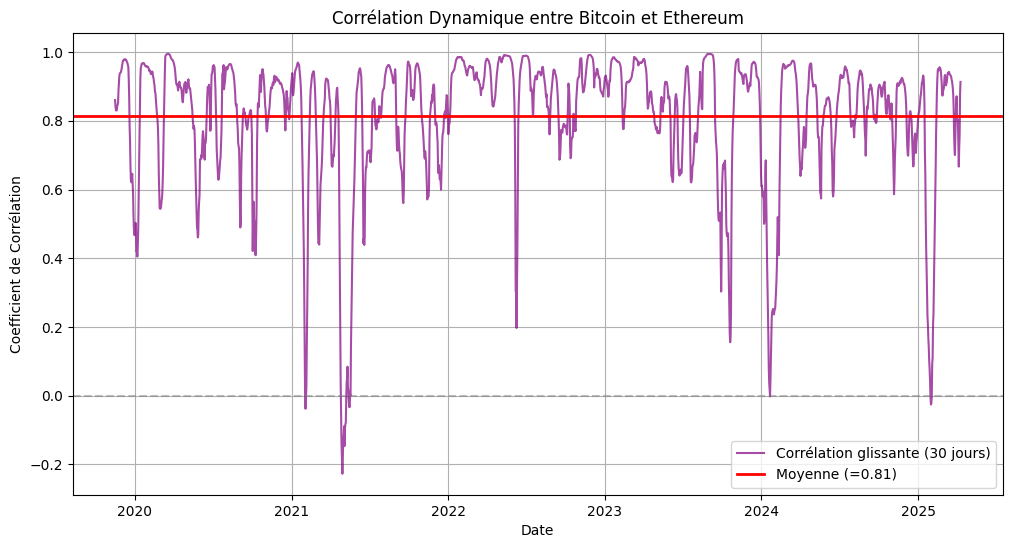

In [ ]:
# Collecte des données
btc_data = collect_data_crypto_compare('BTC', start_timestamp, end_timestamp)
eth_data = collect_data_crypto_compare('ETH', start_timestamp, end_timestamp)

# Fusion des données sur la colonne 'time'
merged_data = pd.merge(btc_data[['time', 'close']], eth_data[['time', 'close']], on='time', suffixes=('_btc', '_eth'))

# Calcul de la corrélation glissante (fenêtre de 30 jours)
# Calcul de la corrélation glissante (fenêtre de 30 jours)
window = 30
merged_data['rolling_corr'] = merged_data['close_btc'].rolling(window).corr(merged_data['close_eth'])

# Calcul de la moyenne de la corrélation
mean_correlation = merged_data['rolling_corr'].mean()

# Tracé de la corrélation dynamique + moyenne
plt.figure(figsize=(12, 6))
plt.plot(merged_data['time'], merged_data['rolling_corr'], label=f'Corrélation glissante ({window} jours)', color='purple', alpha=0.7)
plt.axhline(y=mean_correlation, color='red', linestyle='-', label=f'Moyenne (={mean_correlation:.2f})', linewidth=2)
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Coefficient de Corrélation')
plt.title('Corrélation Dynamique entre Bitcoin et Ethereum')
plt.legend()
plt.grid(True)
plt.show()

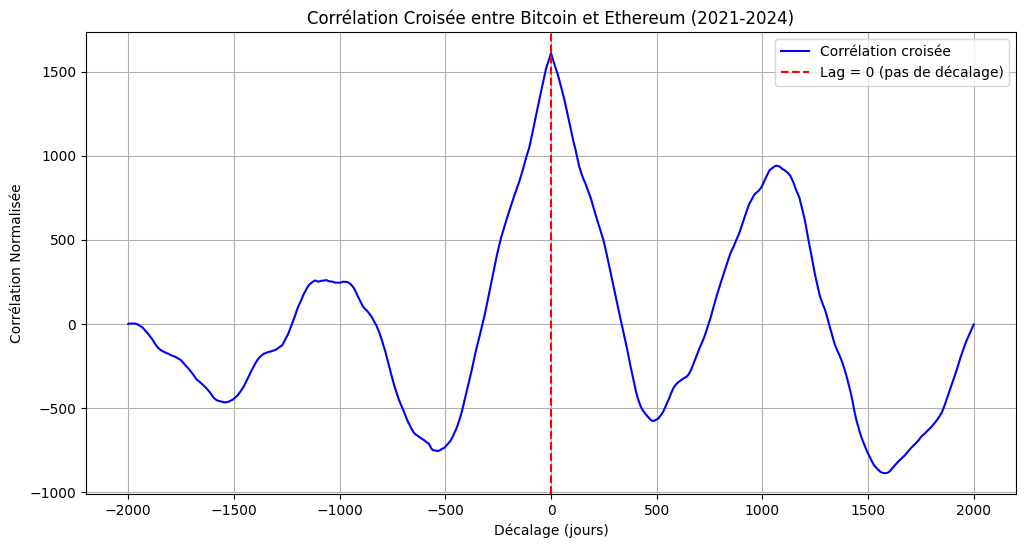

Corrélation maximale: 1608.99 à un décalage de 0 jours.


In [ ]:

# Téléchargement des données
btc_data = collect_data_crypto_compare('BTC', start_timestamp, end_timestamp)
eth_data = collect_data_crypto_compare('ETH', start_timestamp, end_timestamp)

# 2. Nettoyage et alignement des séries temporelles
btc_prices = btc_data['close'].values
eth_prices = eth_data['close'].values

# Normalisation (pour une corrélation comparable)
btc_normalized = (btc_prices - np.mean(btc_prices)) / np.std(btc_prices)
eth_normalized = (eth_prices - np.mean(eth_prices)) / np.std(eth_prices)

# 3. Calcul de la corrélation croisée
cross_corr = np.correlate(btc_normalized, eth_normalized, mode='full')
lags = np.arange(-len(btc_prices) + 1, len(btc_prices))  # Décalages en jours

# 4. Visualisation
plt.figure(figsize=(12, 6))
plt.plot(lags, cross_corr, label='Corrélation croisée', color='blue')
plt.axvline(x=0, color='red', linestyle='--', label='Lag = 0 (pas de décalage)')
plt.xlabel('Décalage (jours)')
plt.ylabel('Corrélation Normalisée')
plt.title('Corrélation Croisée entre Bitcoin et Ethereum (2021-2024)')
plt.grid(True)
plt.legend()
plt.show()

# 5. Analyse des pics
max_corr = np.max(cross_corr)
best_lag = lags[np.argmax(cross_corr)]
print(f"Corrélation maximale: {max_corr:.2f} à un décalage de {best_lag} jours.")

# Analyse du Diagramme de Corrélation Croisée (BTC/ETH - 2021-2024)

## 1. Description du Graphique
Le graphique montre la **corrélation croisée normalisée** entre les prix de Bitcoin (BTC) et Ethereum (ETH) pour des décalages temporels (*lags*) allant de **-2000 à +2000 jours** (environ 5.5 ans).  

- **Axe X (*Lag*)** :  
  - `Lag = 0` : Corrélation instantanée (pas de décalage).  
  - `Lag > 0` : BTC précède ETH.  
  - `Lag < 0` : ETH précède BTC.  
- **Axe Y** : Coefficient de corrélation normalisé (de -1 à 1).  

---

## 2. Observations Clés
### **Pic central à Lag = 0**  
- La corrélation est **maximale** (proche de 1), indiquant que BTC et ETH évoluent de manière synchrone sans délai.  
- *Interprétation* : Les deux cryptos réagissent simultanément aux mêmes événements de marché (ex: tendances macroéconomiques).  

### **Symétrie globale**  
- Le graphique est approximativement symétrique autour de `Lag = 0`, suggérant qu'**aucune crypto ne domine systématiquement l'autre** sur le long terme.  

### **Absence de pics secondaires**  
- Aucun pic significatif n'apparaît pour `Lag ≠ 0`, ce qui signifie qu'il n'y a pas de **dépendance temporelle décalée** (ex: BTC n'influence pas ETH avec un délai fixe).  

---

## 3. Implications pour le Trading
- **Diversification limitée** : La forte corrélation instantanée réduit l'intérêt de détenir BTC et ETH pour diversifier un portefeuille.  
- **Stratégies court-termistes** : Privilégiez des indicateurs haute fréquence (ex: données on-chain) plutôt que des décalages temporels pour anticiper les mouvements.  

---

## 4. Limitations
- **Période analysée** : Les données couvrent 2021–2024, une période de marché haussier puis baissier. Des analyses par sous-périodes (ex: bull/bear markets) pourraient révéler des dynamiques différentes.  
- **Normalisation** : La corrélation est calculée sur des prix normalisés, masquant les amplitudes réelles des variations.  

---

### **Résumé**  
*"BTC et ETH sont fortement corrélés sans délai, ce qui suggère des réactions synchrones aux chocs de marché, mais aucun lead-lag significatif."*  


=== Test de causalité de Granger (BTC -> ETH) ===

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9775  , p=0.3229  , df_denom=1996, df_num=1
ssr based chi2 test:   chi2=0.9789  , p=0.3225  , df=1
likelihood ratio test: chi2=0.9787  , p=0.3225  , df=1
parameter F test:         F=0.9775  , p=0.3229  , df_denom=1996, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.0321  , p=0.3565  , df_denom=1993, df_num=2
ssr based chi2 test:   chi2=2.0693  , p=0.3553  , df=2
likelihood ratio test: chi2=2.0683  , p=0.3555  , df=2
parameter F test:         F=1.0321  , p=0.3565  , df_denom=1993, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.6482  , p=0.1763  , df_denom=1990, df_num=3
ssr based chi2 test:   chi2=4.9620  , p=0.1746  , df=3
likelihood ratio test: chi2=4.9558  , p=0.1751  , df=3
parameter F test:         F=1.6482  , p=0.1763  , df_denom=1990, df_num=3

Granger Causality
number of lags (no 

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


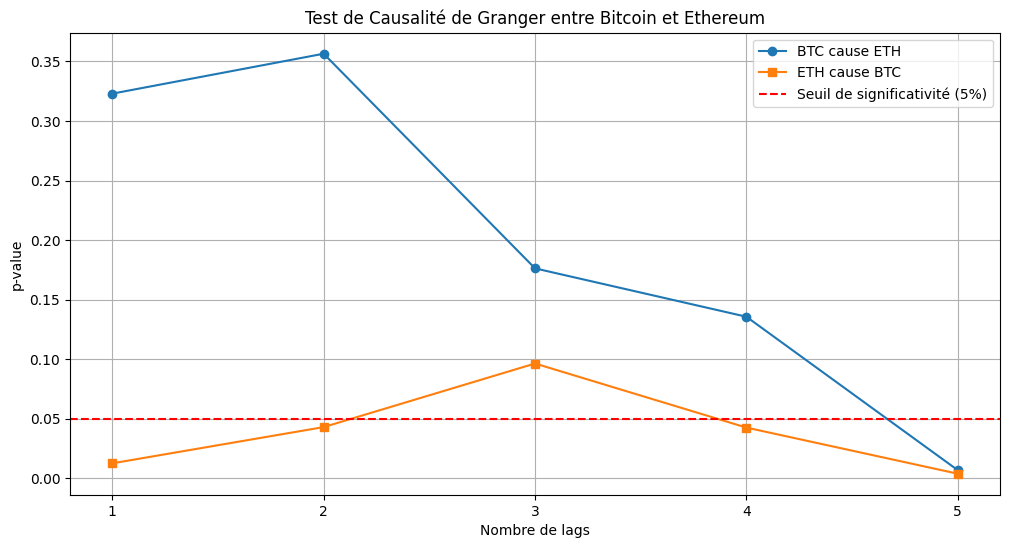

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import time
from datetime import datetime
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from statsmodels.tsa.api import VAR

# 1. Fonction de collecte des données CryptoCompare
def collect_data_crypto_compare(crypto_symbol, start_timestamp, end_timestamp):
    url = 'https://min-api.cryptocompare.com/data/v2/histoday'
    params = {
        'fsym': crypto_symbol,
        'tsym': 'USD',
        'limit': 2000,
        'toTs': end_timestamp,
        'extraParams': 'crypto_prediction'
    }
    response = requests.get(url, params=params)

    if response.status_code == 200:
        data = response.json()['Data']['Data']
        df = pd.DataFrame(data)
        df['time'] = pd.to_datetime(df['time'], unit='s')
        df.set_index('time', inplace=True)
        return df
    else:
        print(f"Erreur lors de la récupération des données: {response.status_code}")
        return None

# 2. Définir les timestamps de début et de fin
start_timestamp = 1614556800  # Exemple : 1er mars 2021
end_timestamp = int(time.time())

# 3. Téléchargement des données
btc_df = collect_data_crypto_compare('BTC', start_timestamp, end_timestamp)
eth_df = collect_data_crypto_compare('ETH', start_timestamp, end_timestamp)

# 4. Nettoyage et préparation
btc = btc_df['close']
eth = eth_df['close']
data = pd.concat([btc, eth], axis=1)
data.columns = ['Bitcoin', 'Ethereum']
data = data.dropna()

# 5. Différenciation pour stationnarité
data_diff = data.diff().dropna()

# 6. Test de Granger
print("=== Test de causalité de Granger (BTC -> ETH) ===")
granger_btc_eth = grangercausalitytests(data_diff[['Ethereum', 'Bitcoin']], maxlag=5, verbose=True)

print("\n=== Test de causalité de Granger (ETH -> BTC) ===")
granger_eth_btc = grangercausalitytests(data_diff[['Bitcoin', 'Ethereum']], maxlag=5, verbose=True)

# 7. Extraction des p-values
def extract_pvalues(results, maxlag):
    return [results[i+1][0]['ssr_ftest'][1] for i in range(maxlag)]

pvals_btc_eth = extract_pvalues(granger_btc_eth, 5)
pvals_eth_btc = extract_pvalues(granger_eth_btc, 5)

# 8. Visualisation des p-values
plt.figure(figsize=(12, 6))
plt.plot(range(1, 6), pvals_btc_eth, marker='o', label='BTC cause ETH')
plt.plot(range(1, 6), pvals_eth_btc, marker='s', label='ETH cause BTC')
plt.axhline(y=0.05, color='red', linestyle='--', label='Seuil de significativité (5%)')
plt.title('Test de Causalité de Granger entre Bitcoin et Ethereum')
plt.xlabel('Nombre de lags')
plt.ylabel('p-value')
plt.xticks(range(1, 6))
plt.legend()
plt.grid(True)
plt.show()

# 9. Modèle VAR
model = VAR


In [ ]:
# Récupérer les données
btc_data = collect_data_crypto_compare('BTC', start_timestamp, end_timestamp)
eth_data = collect_data_crypto_compare('ETH', start_timestamp, end_timestamp)

# Vérification
if btc_data is not None and eth_data is not None:
    # Fusionner sur la colonne 'time'
    merged = pd.merge(btc_data[['time', 'close']], eth_data[['time', 'close']], on='time', suffixes=('_btc', '_eth'))

    # Trier par date
    merged.sort_values('time', inplace=True)

    # Extraire les séries de prix
    btc_prices = merged['close_btc']
    eth_prices = merged['close_eth']

    # Calcul et affichage des corrélations avec lags
    print("Corrélations avec différents lags :")
    lags = range(1, 11)
    correlations = []
    for lag in lags:
        shifted_eth = eth_prices.shift(lag)
        corr = btc_prices.corr(shifted_eth)
        correlations.append(corr)
        print(f"Lag {lag} : Corrélation = {corr:.4f}")

    # Tracer la courbe
    plt.figure(figsize=(10, 5))
    plt.plot(lags, correlations, marker='o', linestyle='-')
    plt.title("Corrélation entre BTC et ETH avec différents lags")
    plt.xlabel("Lag (jours)")
    plt.ylabel("Corrélation")
    plt.grid(True)
    plt.xticks(lags)
    plt.show()
else:
    print("Erreur : Données BTC ou ETH manquantes.")


KeyError: "['time'] not in index"

Corrélations avec différents lags :
Lag 1 : Corrélation = 0.8022
Lag 2 : Corrélation = 0.8007
Lag 3 : Corrélation = 0.7991
Lag 4 : Corrélation = 0.7975
Lag 5 : Corrélation = 0.7956
Lag 6 : Corrélation = 0.7938
Lag 7 : Corrélation = 0.7918
Lag 8 : Corrélation = 0.7901
Lag 9 : Corrélation = 0.7885
Lag 10 : Corrélation = 0.7868


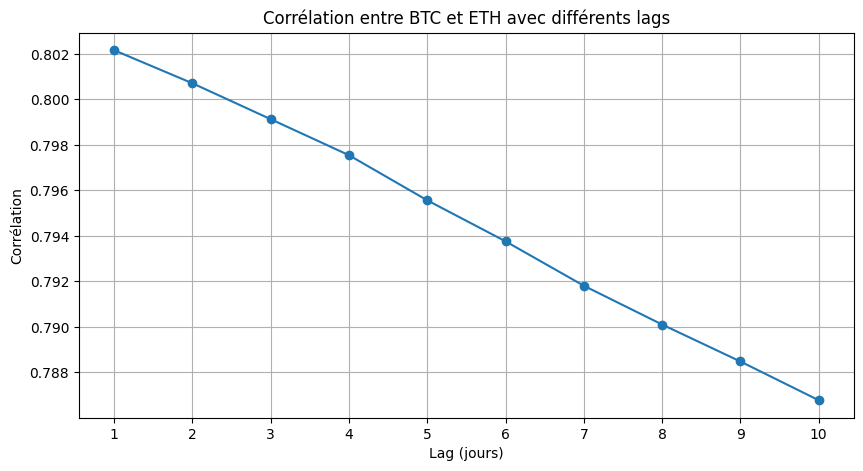

In [ ]:
# Récupérer les données
btc_data = collect_data_crypto_compare('BTC', start_timestamp, end_timestamp)
eth_data = collect_data_crypto_compare('ETH', start_timestamp, end_timestamp)

# Vérification
if btc_data is not None and eth_data is not None:
    # Reset 'time' to a column if it's the index
    if btc_data.index.name == 'time':
        btc_data = btc_data.reset_index()
    if eth_data.index.name == 'time':
        eth_data = eth_data.reset_index()

    # Fusionner sur la colonne 'time'
    merged = pd.merge(btc_data[['time', 'close']], eth_data[['time', 'close']], on='time', suffixes=('_btc', '_eth'))

    # Trier par date
    merged.sort_values('time', inplace=True)

    # Extraire les séries de prix
    btc_prices = merged['close_btc']
    eth_prices = merged['close_eth']

    # Calcul et affichage des corrélations avec lags
    print("Corrélations avec différents lags :")
    lags = range(1, 11)
    correlations = []
    for lag in lags:
        shifted_eth = eth_prices.shift(lag)
        corr = btc_prices.corr(shifted_eth)
        correlations.append(corr)
        print(f"Lag {lag} : Corrélation = {corr:.4f}")

    # Tracer la courbe
    plt.figure(figsize=(10, 5))
    plt.plot(lags, correlations, marker='o', linestyle='-')
    plt.title("Corrélation entre BTC et ETH avec différents lags")
    plt.xlabel("Lag (jours)")
    plt.ylabel("Corrélation")
    plt.grid(True)
    plt.xticks(lags)
    plt.show()
else:
    print("Erreur : Données BTC ou ETH manquantes.")

In [ ]:
from statsmodels.tsa.api import VAR

# Préparer les données pour le modèle VAR
data = pd.concat([bitcoin_data['close'], ethereum_data['close']], axis=1)
data.columns = ['Bitcoin', 'Ethereum']

# Créer un modèle VAR
model = VAR(data)
model_fitted = model.fit(5)  # Ajuster le modèle avec un nombre de lags (ici 5)

# Résumé du modèle
print(model_fitted.summary())


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 09, Apr, 2025
Time:                     17:47:20
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    22.7134
Nobs:                     1996.00    HQIC:                   22.6744
Log likelihood:          -28248.8    FPE:                6.87876e+09
AIC:                      22.6517    Det(Omega_mle):     6.80357e+09
--------------------------------------------------------------------
Results for equation Bitcoin
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const             125.923063        61.468239            2.049           0.041
L1.Bitcoin          1.006339         0.035020           28.736           0.000
L1.Ethereum        -1.349478         0.521385           -2.588    

In [ ]:
bitcoin_data.head()

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
0,2019-10-18,8157.36,7850.66,8082.46,27732.54,2.210659e+08,7972.62,direct,
1,2019-10-19,8108.69,7919.05,7972.62,17875.39,1.432024e+08,7973.63,direct,
2,2019-10-20,8326.13,7911.49,7973.63,25287.68,2.053943e+08,8247.25,direct,
3,2019-10-21,8359.52,8177.11,8247.25,22831.65,1.885115e+08,8223.25,direct,
4,2019-10-22,8318.41,8021.36,8223.25,24453.79,2.005939e+08,8034.50,direct,


In [ ]:
bitcoin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   time              2001 non-null   datetime64[ns]
 1   high              2001 non-null   float64       
 2   low               2001 non-null   float64       
 3   open              2001 non-null   float64       
 4   volumefrom        2001 non-null   float64       
 5   volumeto          2001 non-null   float64       
 6   close             2001 non-null   float64       
 7   conversionType    2001 non-null   object        
 8   conversionSymbol  2001 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 140.8+ KB


In [ ]:
bitcoin_data.describe()

,time,high,low,open,volumefrom,volumeto,close
count,2001,2001.000000,2001.000000,2001.000000,2001.000000,2.001000e+03,2001.000000
mean,2022-07-14 00:00:00,38849.394168,37067.532594,37984.912404,40664.601764,1.472232e+09,38021.660145
min,2019-10-18 00:00:00,5364.930000,3948.920000,4916.780000,3495.960000,7.959746e+07,4916.780000
25%,2021-03-01 00:00:00,19488.810000,18733.670000,19181.410000,22783.460000,5.245115e+08,19182.010000
50%,2022-07-14 00:00:00,34253.500000,31601.990000,33084.080000,34442.640000,1.094032e+09,33088.510000
75%,2023-11-26 00:00:00,57528.160000,53742.580000,55863.730000,50094.060000,1.877438e+09,55866.600000
max,2025-04-09 00:00:00,109340.210000,105308.990000,106155.610000,319316.540000,1.204144e+10,106155.610000
std,NaN,24852.294588,23778.034549,24338.581196,28262.105219,1.423213e+09,24348.918024


In [ ]:
ethereum_data.head()

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
0,2019-10-18,175.72,171.73,177.41,1687411.38,2.926047e+08,173.40,multiply,BTC
1,2019-10-19,174.94,170.80,173.40,1290858.94,2.224281e+08,172.31,multiply,BTC
2,2019-10-20,178.88,175.01,172.31,1429636.02,2.513749e+08,175.83,multiply,BTC
3,2019-10-21,176.55,173.02,175.83,1694348.83,2.953807e+08,174.33,multiply,BTC
4,2019-10-22,179.33,168.16,174.33,1885090.78,3.230591e+08,171.38,multiply,BTC


In [ ]:
ethereum_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   time              2001 non-null   datetime64[ns]
 1   high              2001 non-null   float64       
 2   low               2001 non-null   float64       
 3   open              2001 non-null   float64       
 4   volumefrom        2001 non-null   float64       
 5   volumeto          2001 non-null   float64       
 6   close             2001 non-null   float64       
 7   conversionType    2001 non-null   object        
 8   conversionSymbol  2001 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 140.8+ KB


In [ ]:
ethereum_data.describe()

,time,high,low,open,volumefrom,volumeto,close
count,2001,2001.000000,2001.000000,2001.000000,2.001000e+03,2.001000e+03,2001.000000
mean,2022-07-14 00:00:00,1997.239875,1882.580345,1943.004023,7.229782e+05,9.469338e+08,1943.711954
min,2019-10-18 00:00:00,117.550000,105.220000,110.230000,2.981167e+04,3.759109e+07,110.230000
25%,2021-03-01 00:00:00,1233.380000,1172.990000,1211.070000,2.669968e+05,3.472393e+08,1213.840000
50%,2022-07-14 00:00:00,1907.760000,1833.550000,1871.760000,4.333189e+05,7.104750e+08,1871.760000
75%,2023-11-26 00:00:00,2949.740000,2748.460000,2856.120000,7.810362e+05,1.178707e+09,2856.120000
max,2025-04-09 00:00:00,4865.940000,4710.000000,4810.970000,1.098033e+07,9.657969e+09,4810.970000
std,NaN,1200.060640,1130.201155,1167.886572,8.621333e+05,9.218361e+08,1167.244522


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Appliquer le test ADF sur la colonne 'close' de Bitcoin (prix de clôture)
adf_result = adfuller(bitcoin_data['close'])
print("\nRésultats du test de Dickey-Fuller Augmenté (ADF):")
print(f"Statistique du test ADF: {adf_result[0]}")
print(f"Valeur p: {adf_result[1]}")
print("Valeurs critiques:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value}")

if adf_result[1] < 0.05:
    print("La série est stationnaire (on rejette H0).")
else:
    print("La série n'est pas stationnaire (on ne rejette pas H0).")



Résultats du test de Dickey-Fuller Augmenté (ADF):
Statistique du test ADF: -1.0377330770901445
Valeur p: 0.7392545393422805
Valeurs critiques:
   1%: -3.433665351698571
   5%: -2.8630045337025267
   10%: -2.567549656849864
La série n'est pas stationnaire (on ne rejette pas H0).


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Appliquer le test ADF sur la colonne 'close' de Bitcoin (prix de clôture)
adf_result = adfuller(ethereum_data['close'])
print("\nRésultats du test de Dickey-Fuller Augmenté (ADF):")
print(f"Statistique du test ADF: {adf_result[0]}")
print(f"Valeur p: {adf_result[1]}")
print("Valeurs critiques:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value}")

if adf_result[1] < 0.05:
    print("La série est stationnaire (on rejette H0).")
else:
    print("La série n'est pas stationnaire (on ne rejette pas H0).")



Résultats du test de Dickey-Fuller Augmenté (ADF):
Statistique du test ADF: -2.010324203412984
Valeur p: 0.2820647235596337
Valeurs critiques:
   1%: -3.4336519592295947
   5%: -2.862998620943585
   10%: -2.567546508593341
La série n'est pas stationnaire (on ne rejette pas H0).


In [ ]:
from statsmodels.tsa.stattools import kpss

# Appliquer le test KPSS sur la colonne 'close' de Bitcoin (prix de clôture)
kpss_result = kpss(bitcoin_data['close'], regression='c', nlags="auto")

# Affichage des résultats
print("\nRésultats du test KPSS:")
print(f"Statistique du test KPSS: {kpss_result[0]}")
print(f"Valeur p: {kpss_result[1]}")
print("Valeurs critiques:")
for key, value in kpss_result[3].items():
    print(f"   {key}: {value}")

# Interprétation du résultat
if kpss_result[1] < 0.05:
    print("La série est non stationnaire (on rejette H0).")
else:
    print("La série est stationnaire (on ne rejette pas H0).")



Résultats du test KPSS:
Statistique du test KPSS: 3.4209050488283084
Valeur p: 0.01
Valeurs critiques:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739
La série est non stationnaire (on rejette H0).


<ipython-input-30-a95094855ad1>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(bitcoin_data['close'], regression='c', nlags="auto")


In [ ]:
from statsmodels.tsa.stattools import kpss

# Appliquer le test KPSS sur la colonne 'close' de Bitcoin (prix de clôture)
kpss_result = kpss(ethereum_data['close'], regression='c', nlags="auto")

# Affichage des résultats
print("\nRésultats du test KPSS:")
print(f"Statistique du test KPSS: {kpss_result[0]}")
print(f"Valeur p: {kpss_result[1]}")
print("Valeurs critiques:")
for key, value in kpss_result[3].items():
    print(f"   {key}: {value}")

# Interprétation du résultat
if kpss_result[1] < 0.05:
    print("La série est non stationnaire (on rejette H0).")
else:
    print("La série est stationnaire (on ne rejette pas H0).")



Résultats du test KPSS:
Statistique du test KPSS: 2.663530263792811
Valeur p: 0.01
Valeurs critiques:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739
La série est non stationnaire (on rejette H0).


<ipython-input-31-297297ff2db3>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(ethereum_data['close'], regression='c', nlags="auto")


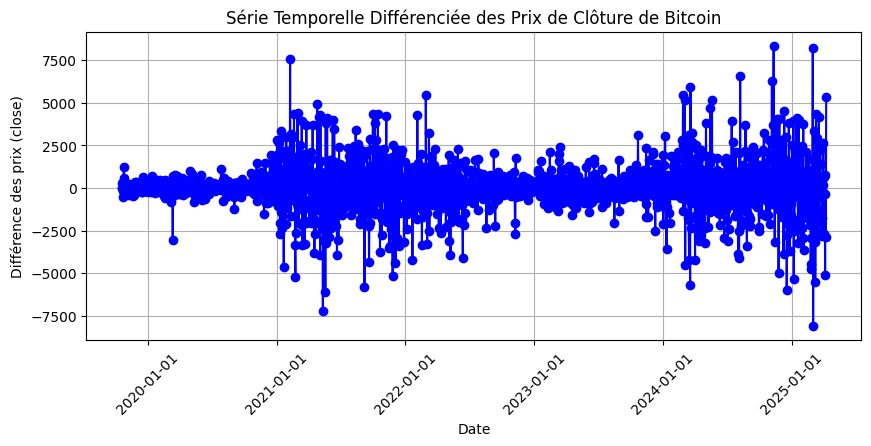

In [ ]:
# Calcul de la différence première des prix de clôture de Bitcoin
diff_res = bitcoin_data['close'].diff().dropna()

# Utiliser l'index des dates correctement pour diff_res
diff_res.index = bitcoin_data['time'].iloc[1:]  # On prend les dates à partir du 2ème point

# Affichage des résultats
plt.figure(figsize=(10, 4))
plt.plot(diff_res, marker='o', linestyle='-', color='b')
plt.title('Série Temporelle Différenciée des Prix de Clôture de Bitcoin')
plt.xlabel('Date')
plt.ylabel('Différence des prix (close)')
plt.grid(True)

# Formater l'axe des X pour afficher les dates au format année-mois-jour
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

# Rotation des dates pour une meilleure lisibilité
plt.xticks(rotation=45)

plt.show()


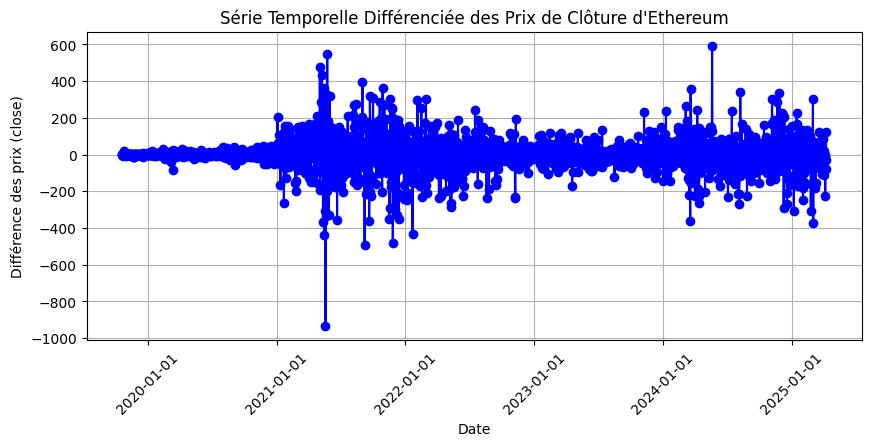

In [ ]:
# Calcul de la différence première des prix de clôture d'Ethereum
diff_res = ethereum_data['close'].diff().dropna()

# Utiliser l'index des dates correctement pour diff_res
diff_res.index = ethereum_data['time'].iloc[1:]  # On prend les dates à partir du 2ème point

# Affichage des résultats
plt.figure(figsize=(10, 4))
plt.plot(diff_res, marker='o', linestyle='-', color='b')
plt.title('Série Temporelle Différenciée des Prix de Clôture d\'Ethereum')
plt.xlabel('Date')
plt.ylabel('Différence des prix (close)')
plt.grid(True)

# Formater l'axe des X pour afficher les dates au format année-mois-jour
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

# Rotation des dates pour une meilleure lisibilité
plt.xticks(rotation=45)

plt.show()



Autocorrélation (ACF) des prix de clôture de Bitcoin:
[1.         0.99719436 0.99478231 0.99224711 0.9897376  0.98694891
 0.98413199 0.98140915 0.97878511 0.97622361 0.97350707 0.97071111
 0.96787543 0.96509352 0.96197518 0.95888929 0.95586029 0.95292226
 0.94993056 0.94708587 0.94437953 0.94165805 0.93882025 0.93611205
 0.93340379 0.930519   0.92748063 0.92439716 0.92131392 0.91802535
 0.91492217 0.91185362 0.90852057 0.90505361 0.90141414 0.89769534
 0.89387365 0.89022781 0.88662578 0.88285998 0.87944452 0.87585566
 0.87235856 0.86906319 0.86552993 0.861679   0.8578035  0.85398704
 0.85024385 0.84633113 0.84250554 0.83866718 0.83503378 0.83141969
 0.82775353 0.82398815 0.82017133 0.81619743 0.81216171 0.80798326
 0.80376907 0.79969504 0.79548465 0.79140892 0.78740136 0.78336743
 0.77909181 0.77494793 0.77057807 0.7660241  0.76146    0.75680695
 0.7522266  0.74771881 0.7433842  0.73904999 0.73469145 0.73045842
 0.72628352 0.72193848 0.71774156 0.71338678 0.70887737 0.70447392
 0.7003

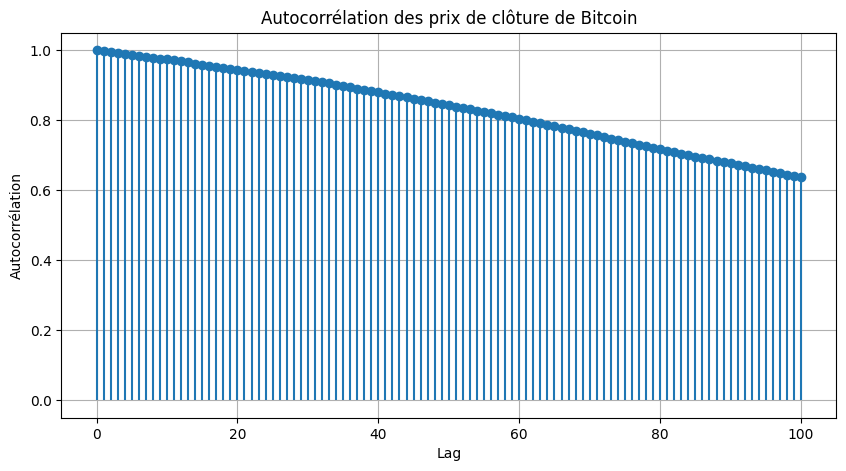

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Calculer l'autocorrélation de la série de prix de clôture de Bitcoin
pp_result = sm.tsa.acf(bitcoin_data['close'], nlags=100)  # Calculer l'autocorrélation pour 40 lags

# Affichage des résultats
print("\nAutocorrélation (ACF) des prix de clôture de Bitcoin:")
print(pp_result)

# Affichage graphique de l'autocorrélation
plt.figure(figsize=(10, 5))
plt.stem(range(len(pp_result)), pp_result, basefmt=" ")  # On retire l'argument use_line_collection
plt.xlabel('Lag')
plt.ylabel('Autocorrélation')
plt.title('Autocorrélation des prix de clôture de Bitcoin')
plt.grid(True)
plt.show()



Autocorrélation (ACF) des prix de clôture de Ethereum:
[1.         0.9962282  0.99291465 0.98947673 0.98585441 0.98214497
 0.97877164 0.97495831 0.97128097 0.96786245 0.96433313 0.9606683
 0.95695627 0.95355665 0.94990865 0.94643085 0.94306277 0.94003981
 0.93668344 0.93355271 0.93052508 0.92752825 0.92441461 0.92130382
 0.91813112 0.91487466 0.91145711 0.90803179 0.90431274 0.90021074
 0.896273   0.8920063  0.88751577 0.88333775 0.87882238 0.87435901
 0.86975754 0.86523073 0.86078473 0.8567782  0.8529756  0.84900692
 0.84520098 0.84136414 0.83753932 0.83379649 0.83042306 0.82717541
 0.82395316 0.82066804 0.81755581 0.81440319 0.81156973 0.80875662
 0.80579058 0.80275842 0.79960194 0.7961669  0.79268971 0.78902
 0.78526795 0.78168425 0.77806899 0.77432929 0.77090295 0.76755621
 0.76440308 0.7612625  0.75809994 0.75467397 0.75142434 0.74814232
 0.745152   0.7424113  0.73994926 0.73760064 0.73518153 0.73290688
 0.73069953 0.72868207 0.7266317  0.72425479 0.72173506 0.71942614
 0.7171087

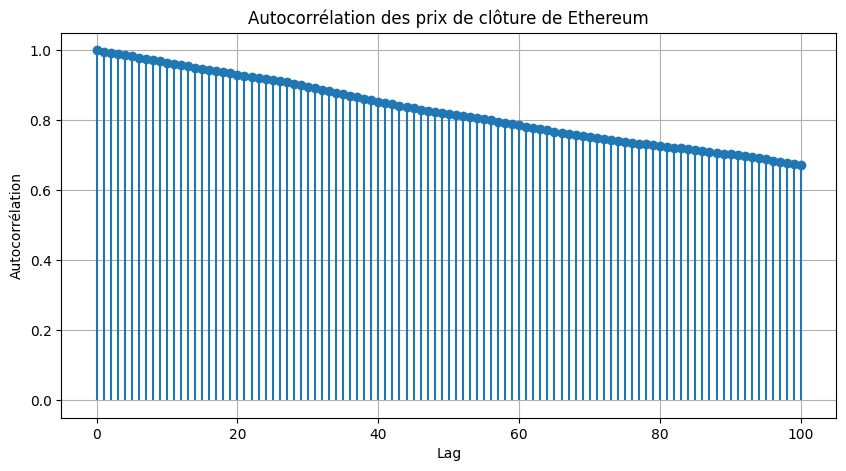

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Calculer l'autocorrélation de la série de prix de clôture de Bitcoin
pp_result = sm.tsa.acf(ethereum_data['close'], nlags=100)  # Calculer l'autocorrélation pour 40 lags

# Affichage des résultats
print("\nAutocorrélation (ACF) des prix de clôture de Ethereum:")
print(pp_result)

# Affichage graphique de l'autocorrélation
plt.figure(figsize=(10, 5))
plt.stem(range(len(pp_result)), pp_result, basefmt=" ")  # On retire l'argument use_line_collection
plt.xlabel('Lag')
plt.ylabel('Autocorrélation')
plt.title('Autocorrélation des prix de clôture de Ethereum')
plt.grid(True)
plt.show()



PACF des prix de clôture de Bitcoin:
[ 1.00000000e+00  9.97692959e-01  8.38296933e-02 -2.10785929e-02
  1.65288021e-04 -6.15591086e-02 -1.81982474e-02  1.98361887e-02
  2.41022969e-02  1.89813224e-02 -3.26434430e-02 -2.81744230e-02
 -1.62055718e-02  7.36317749e-03 -6.89290212e-02 -2.46275170e-03
  1.57336637e-02  1.78889861e-02 -5.18924419e-03  2.98984214e-02
  3.13471356e-02 -5.68085121e-03 -3.11407599e-02  2.47667080e-02
  3.88420190e-03 -4.02985601e-02 -4.03604065e-02 -1.22664591e-02
 -5.10966120e-03 -4.90235416e-02  3.32887466e-02  1.98620734e-02
 -6.82823816e-02 -4.80573458e-02 -4.66623828e-02 -1.98702663e-02
 -2.16275358e-02  4.23478666e-02  3.32811943e-02 -3.26783880e-02
  6.33334135e-02 -3.56985192e-02  1.52954818e-02  5.07502540e-02
 -6.23470701e-02 -7.59253663e-02 -1.09213102e-02  5.56832549e-03
  2.03167706e-02 -2.38629482e-02  9.83950456e-03 -2.20681227e-02
  3.42976123e-02  8.82188630e-03 -8.24484065e-03 -2.58288045e-02
 -2.48515681e-02 -3.22293700e-02 -1.35347304e-03 -1.

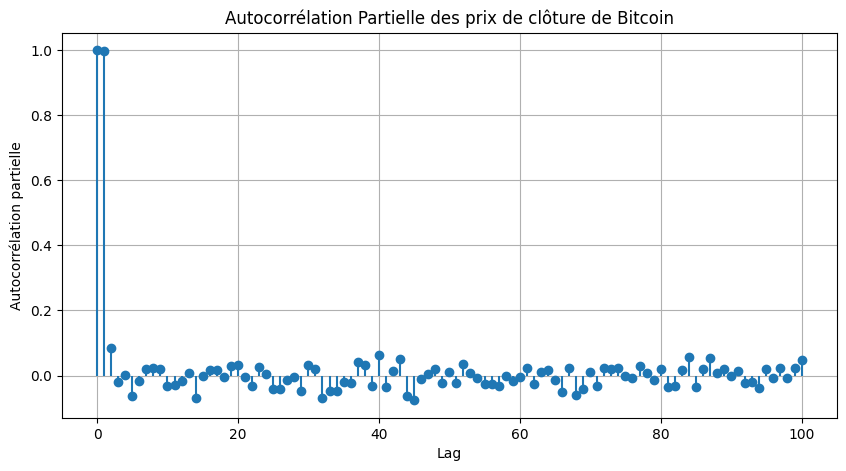

In [ ]:
from statsmodels.tsa.stattools import pacf
import matplotlib.pyplot as plt

# Calcul de la fonction d'autocorrélation partielle (PACF) pour 40 lags
pacf_result = pacf(bitcoin_data['close'], nlags=100)

# Affichage des résultats
print("\nPACF des prix de clôture de Bitcoin:")
print(pacf_result)

# Affichage graphique de la PACF
plt.figure(figsize=(10, 5))
plt.stem(range(len(pacf_result)), pacf_result, basefmt=" ")
plt.xlabel('Lag')
plt.ylabel('Autocorrélation partielle')
plt.title('Autocorrélation Partielle des prix de clôture de Bitcoin')
plt.grid(True)
plt.show()



PACF des prix de clôture de Euthereum:
[ 1.00000000e+00  9.96726310e-01  6.80347751e-02 -1.61360405e-02
 -3.27035153e-02 -1.93437373e-02  4.86751723e-02 -6.14985068e-02
  9.23191836e-03  3.98102852e-02 -1.19551004e-02 -2.34680638e-02
 -2.07846928e-02  5.12662484e-02 -3.03463957e-02  1.29488771e-02
  1.79458839e-02  5.73400640e-02 -4.40970062e-02  1.18217320e-02
  2.41495032e-02  8.92627313e-03 -2.14829639e-02 -1.60206873e-02
  2.10051274e-04 -1.19864889e-02 -3.98590743e-02 -4.27668021e-03
 -4.15911886e-02 -6.35162847e-02  6.46202791e-03 -4.10533129e-02
 -3.65211665e-02  4.00943410e-02 -5.41167552e-02  1.55428191e-02
 -3.48812907e-02  5.59723679e-03  2.11142869e-02  6.16698286e-02
  4.12349732e-02 -3.32404364e-02  1.83422499e-02 -1.33502592e-02
 -6.22229930e-03  9.16315093e-03  5.24233076e-02  3.28037693e-02
 -8.33775808e-03 -1.29013124e-02  1.39837200e-02  8.79861817e-03
  4.28962995e-02  1.45303271e-02 -1.22407249e-02 -9.04384958e-03
 -2.52598028e-02 -4.29957694e-02 -3.05548286e-03 -

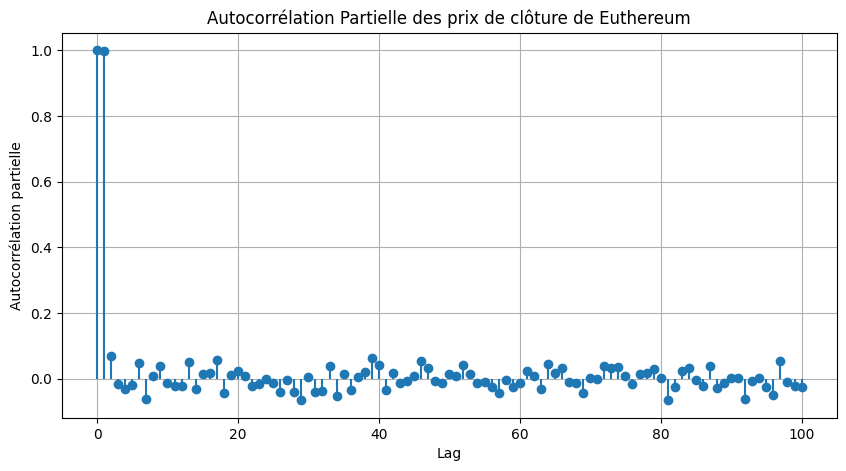

In [ ]:
from statsmodels.tsa.stattools import pacf
import matplotlib.pyplot as plt

# Calcul de la fonction d'autocorrélation partielle (PACF) pour 40 lags
pacf_result = pacf(ethereum_data['close'], nlags=100)

# Affichage des résultats
print("\nPACF des prix de clôture de Euthereum:")
print(pacf_result)

# Affichage graphique de la PACF
plt.figure(figsize=(10, 5))
plt.stem(range(len(pacf_result)), pacf_result, basefmt=" ")
plt.xlabel('Lag')
plt.ylabel('Autocorrélation partielle')
plt.title('Autocorrélation Partielle des prix de clôture de Euthereum')
plt.grid(True)
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Définition du modèle ARIMA avec les paramètres (0,1,0)
model = ARIMA(bitcoin_data['close'], order=(0, 1, 0))

# Ajuster le modèle sur les données
model_fit = model.fit()

# Afficher le résumé du modèle ajusté
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 2001
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -17308.443
Date:                Wed, 09 Apr 2025   AIC                          34618.887
Time:                        17:49:12   BIC                          34624.488
Sample:                             0   HQIC                         34620.943
                               - 2001                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.924e+06   3.11e+04     61.780      0.000    1.86e+06    1.99e+06
Ljung-Box (L1) (Q):                   7.52   Jarque-Bera (JB):              2637.95
Prob(Q):                              0.01   Pr

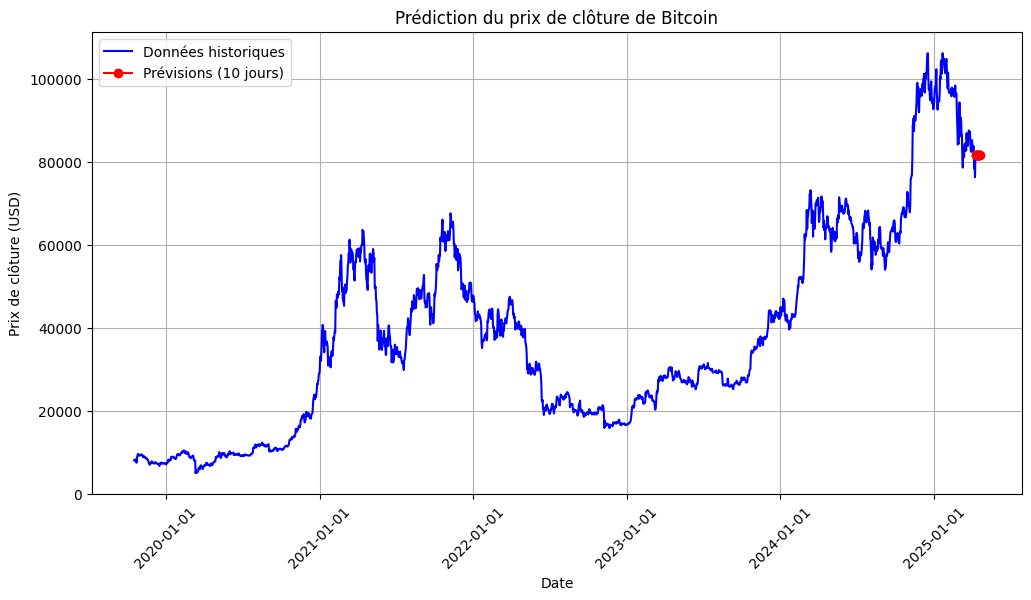

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Faire une prédiction pour les 10 prochaines étapes (en utilisant model_fit)
forecast = model_fit.forecast(steps=10)

# Générer une plage de dates pour les prévisions (en supposant que tes données sont journalières)
forecast_index = pd.date_range(start=bitcoin_data['time'].iloc[-1], periods=11, freq='D')[1:]

# Tracer la série historique des prix de clôture de Bitcoin
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_data['time'], bitcoin_data['close'], label='Données historiques', color='blue')

# Tracer les prévisions en les ajoutant à la fin des données historiques
plt.plot(forecast_index, forecast, label='Prévisions (10 jours)', color='red', marker='o')

# Ajouter des labels et une légende
plt.title('Prédiction du prix de clôture de Bitcoin')  # Modifier le titre pour Bitcoin
plt.xlabel('Date')
plt.ylabel('Prix de clôture (USD)')
plt.legend()

# Formater l'axe des X pour afficher les dates au format année-mois-jour
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

# Ajouter une grille et afficher le graphique
plt.grid(True)
plt.xticks(rotation=45)  # Rotation des dates pour une meilleure lisibilité
plt.show()


In [ ]:
import numpy as np

# Calcul des résidus (erreurs) du modèle ajusté
residuals = model_fit.resid

# Erreur Absolue Moyenne (MAE)
mae = np.mean(np.abs(residuals))
print("Mean Absolute Error (MAE): ", mae)

# Erreur Quadratique Moyenne Racine (RMSE)
rmse = np.sqrt(np.mean(residuals**2))
print("Root Mean Squared Error (RMSE): ", rmse)

# Erreur Absolue en Pourcentage Moyenne (MAPE)
# On utilise les données réelles pour calculer le MAPE (il faut que tu aies les valeurs réelles de tes prévisions).
# Supposons que 'bitcoin_data['close']' contient les valeurs réelles de la série.
# Attention : Le calcul du MAPE ne doit pas inclure des zéros pour éviter la division par zéro.

mape = np.mean(np.abs(residuals) / bitcoin_data['close'][1:]) * 100  # Assure-toi d'utiliser les bonnes valeurs réelles
print("Mean Absolute Percentage Error (MAPE): ", mape)


Mean Absolute Error (MAE):  857.326111944028
Root Mean Squared Error (RMSE):  1398.5896183332318
Mean Absolute Percentage Error (MAPE):  2.274823841979597


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Définition du modèle ARIMA avec les paramètres (0,1,0)
model = ARIMA(ethereum_data['close'], order=(0, 1, 0))

# Ajuster le modèle sur les données
model_fit = model.fit()

# Afficher le résumé du modèle ajusté
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 2001
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -11903.158
Date:                Wed, 09 Apr 2025   AIC                          23808.317
Time:                        17:49:25   BIC                          23813.918
Sample:                             0   HQIC                         23810.373
                               - 2001                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      8645.3884    111.085     77.827      0.000    8427.665    8863.111
Ljung-Box (L1) (Q):                  11.21   Jarque-Bera (JB):              8606.33
Prob(Q):                              0.00   Pr

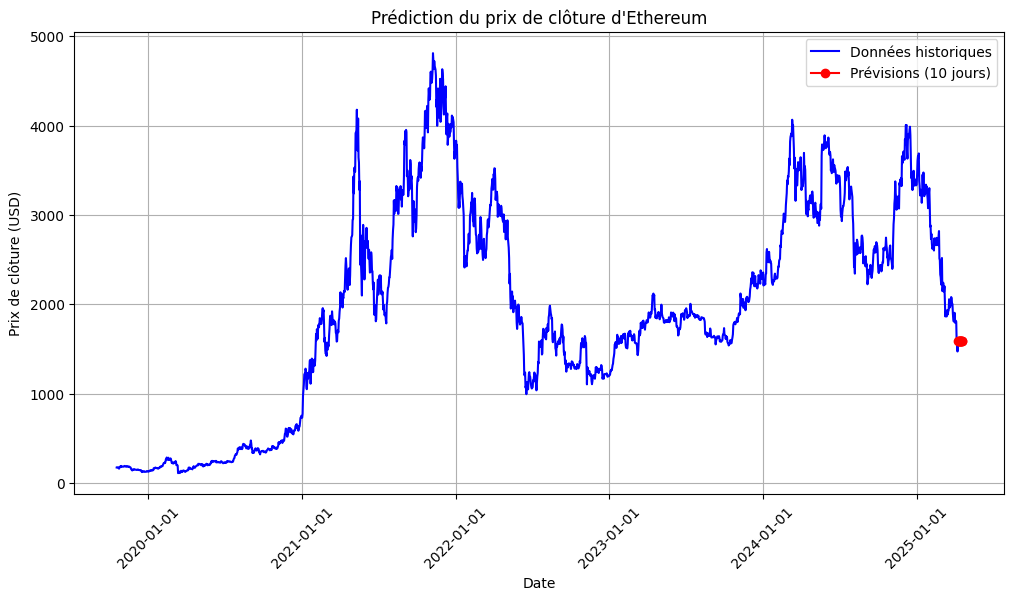

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Faire une prédiction pour les 10 prochaines étapes (en utilisant model_fit)
forecast = model_fit.forecast(steps=10)

# Générer une plage de dates pour les prévisions (en supposant que tes données sont journalières)
forecast_index = pd.date_range(start=ethereum_data['time'].iloc[-1], periods=11, freq='D')[1:]

# Tracer la série historique des prix de clôture d'Ethereum
plt.figure(figsize=(12, 6))
plt.plot(ethereum_data['time'], ethereum_data['close'], label='Données historiques', color='blue')

# Tracer les prévisions en les ajoutant à la fin des données historiques
plt.plot(forecast_index, forecast, label='Prévisions (10 jours)', color='red', marker='o')

# Ajouter des labels et une légende
plt.title('Prédiction du prix de clôture d\'Ethereum')
plt.xlabel('Date')
plt.ylabel('Prix de clôture (USD)')
plt.legend()

# Formater l'axe des X pour afficher les années (ou mois si tu préfères)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

# Ajouter une grille et afficher le graphique
plt.grid(True)
plt.xticks(rotation=45)  # Rotation des dates pour une meilleure lisibilité
plt.show()


In [ ]:
import numpy as np

# Calcul des résidus (erreurs) du modèle ajusté
residuals = model_fit.resid

# Erreur Absolue Moyenne (MAE)
mae = np.mean(np.abs(residuals))
print("Mean Absolute Error (MAE): ", mae)

# Erreur Quadratique Moyenne Racine (RMSE)
rmse = np.sqrt(np.mean(residuals**2))
print("Root Mean Squared Error (RMSE): ", rmse)

# Erreur Absolue en Pourcentage Moyenne (MAPE)
# On utilise les données réelles pour calculer le MAPE (il faut que tu aies les valeurs réelles de tes prévisions).
# Supposons que 'bitcoin_data['close']' contient les valeurs réelles de la série.
# Attention : Le calcul du MAPE ne doit pas inclure des zéros pour éviter la division par zéro.

mape = np.mean(np.abs(residuals) / bitcoin_data['close'][1:]) * 100  # Assure-toi d'utiliser les bonnes valeurs réelles
print("Mean Absolute Percentage Error (MAPE): ", mape)


Mean Absolute Error (MAE):  56.857111444277855
Root Mean Squared Error (RMSE):  93.06134882150464
Mean Absolute Percentage Error (MAPE):  0.1492551188408501


In [ ]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 74.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 91.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 97.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 90.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.5 MB/s eta 0:00:00


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0268 - mae: 0.1162 - val_loss: 0.0021 - val_mae: 0.0362
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0016 - mae: 0.0279 - val_loss: 0.0040 - val_mae: 0.0509
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0015 - mae: 0.0263 - val_loss: 0.0015 - val_mae: 0.0302
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0015 - mae: 0.0261 - val_loss: 0.0031 - val_mae: 0.0442
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0010 - mae: 0.0222 - val_loss: 0.0018 - val_mae: 0.0328
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0010 - mae: 0.0221 - val_loss: 0.0041 - val_mae: 0.0528
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0011 - mae: 0.0225 - val_loss: 0.0027 - val_mae: 0.0420
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 8.4320e-04 - mae: 0.0194 - val_loss: 0.0014 - val_mae: 0.0296
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.00

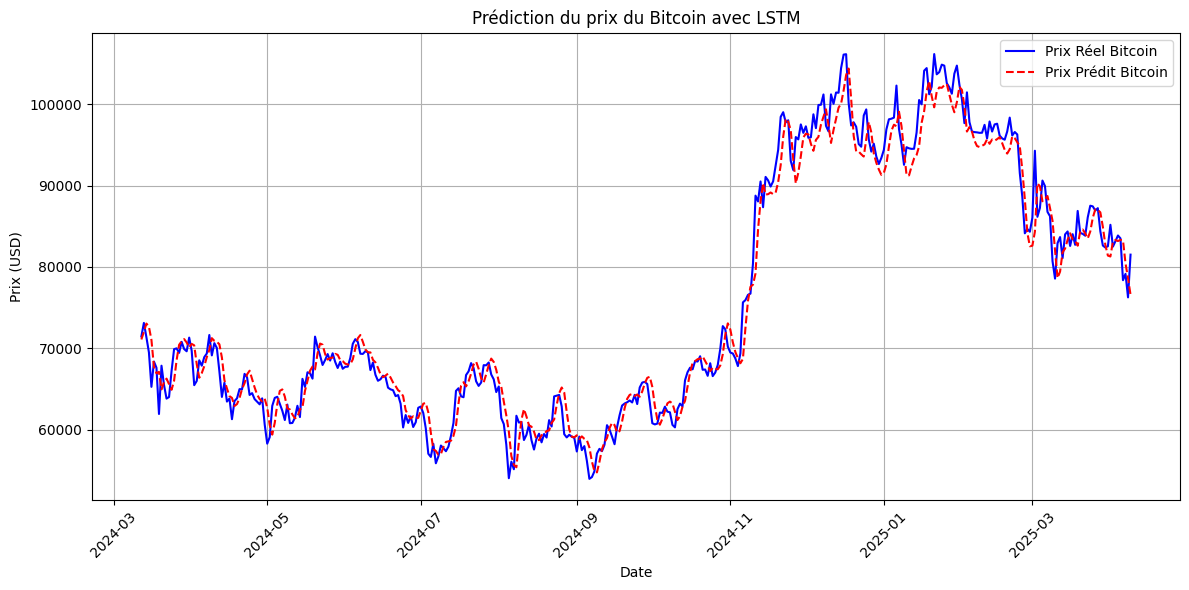

In [ ]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import time
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


# Fonction pour récupérer les données historiques de CryptoCompare
def collect_data_crypto_compare(crypto_symbol, start_timestamp, end_timestamp):
    url = f'https://min-api.cryptocompare.com/data/v2/histoday'
    params = {
        'fsym': crypto_symbol,  # Symbole de la cryptomonnaie (BTC ou ETH)
        'tsym': 'USD',  # Devise de comparaison
        'limit': 2000,  # Limite des jours à récupérer
        'toTs': end_timestamp,  # Timestamp de fin
        'extraParams': 'crypto_prediction'  # Paramètre optionnel pour l'identification de l'application
    }
    response = requests.get(url, params=params)

    if response.status_code == 200:
        data = response.json()['Data']['Data']
        df = pd.DataFrame(data)

        # Convertir les timestamps en dates lisibles
        df['time'] = pd.to_datetime(df['time'], unit='s')

        return df
    else:
        print(f"Erreur lors de la récupération des données: {response.status_code}")
        return None


# Fonction pour prétraiter les données
def preprocess_data(df):
    # Calculer les rendements quotidiens
    df['return'] = df['close'].pct_change()

    # Supprimer les NaN
    df = df.dropna()

    # Normalisation des données avec MinMaxScaler
    scaler = MinMaxScaler(feature_range=(0, 1))
    df_scaled = scaler.fit_transform(df[['close', 'return']])

    return df, df_scaled, scaler


# Fonction pour créer des séquences pour l'entraînement du LSTM
def create_sequences(data, seq_length=30):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length, 0])  # Utiliser uniquement la colonne 'close' pour X
        y.append(data[i + seq_length, 0])  # La cible est la colonne 'close' après seq_length
    return np.array(X), np.array(y)


# Fonction pour construire le modèle LSTM
def build_model(seq_length, input_shape):
    model = Sequential()

    # Première couche LSTM
    model.add(LSTM(units=64, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))

    # Deuxième couche LSTM
    model.add(LSTM(units=64, return_sequences=False))
    model.add(Dropout(0.2))

    # Couche Dense
    model.add(Dense(units=32, activation='relu'))

    # Couche de sortie
    model.add(Dense(units=1))

    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])
    return model


# Fonction principale pour entraîner le modèle
def main():
    # Dates
    today = datetime.today()
    end_timestamp = int(time.mktime(today.timetuple()))
    start_timestamp = 1614556800  # Exemple pour le début de l'année 2021

    # Collecter les données de Bitcoin
    bitcoin_data = collect_data_crypto_compare('BTC', start_timestamp, end_timestamp)

    # Vérification des données
    if bitcoin_data is None:
        return

    # Prétraitement des données
    df, df_scaled, scaler = preprocess_data(bitcoin_data)

    # Création des séquences pour l'entraînement
    seq_length = 30
    X, y = create_sequences(df_scaled, seq_length)

    # Reshape pour LSTM (samples, time steps, features)
    X = X.reshape((X.shape[0], X.shape[1], 1))

    # Division train/test
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Construire le modèle LSTM
    model = build_model(seq_length, input_shape=(X_train.shape[1], 1))

    # EarlyStopping pour éviter le surapprentissage
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Entraîner le modèle
    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping],
        verbose=1
    )

    # Prédictions
    y_pred = model.predict(X_test)

    # Inverser la normalisation pour obtenir les prix réels
    y_test_rescaled = scaler.inverse_transform(np.column_stack((y_test, np.zeros_like(y_test))))[:, 0]
    y_pred_rescaled = scaler.inverse_transform(np.column_stack((y_pred, np.zeros_like(y_pred))))[:, 0]

    # Évaluation
    mse = np.mean((y_test_rescaled - y_pred_rescaled) ** 2)
    rmse = np.sqrt(mse)
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")

    # Visualisation des résultats
    plt.figure(figsize=(12, 6))
    plt.plot(bitcoin_data['time'].iloc[-len(y_test_rescaled):], y_test_rescaled, label='Prix Réel Bitcoin', color='blue')
    plt.plot(bitcoin_data['time'].iloc[-len(y_pred_rescaled):], y_pred_rescaled, label='Prix Prédit Bitcoin', color='red', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Prix (USD)')
    plt.title('Prédiction du prix du Bitcoin avec LSTM')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Appel à la fonction principale
main()


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0240 - val_loss: 0.0194
Epoch 2/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0038 - val_loss: 0.0066
Epoch 3/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0029 - val_loss: 0.0058
Epoch 4/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0031 - val_loss: 0.0086
Epoch 5/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0030 - val_loss: 0.0020
Epoch 6/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0032 - val_loss: 0.0083
Epoch 7/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0030 - val_loss: 0.0021
Epoch 8/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0024 - val_loss: 0.0034
Epoch 9/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0022 - val_loss: 0.0014
Epoch 10/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0020 - val_loss: 0.0038
Epoch 11/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0018 - val_loss: 0.0024
Epoch 12/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0021 - val_l

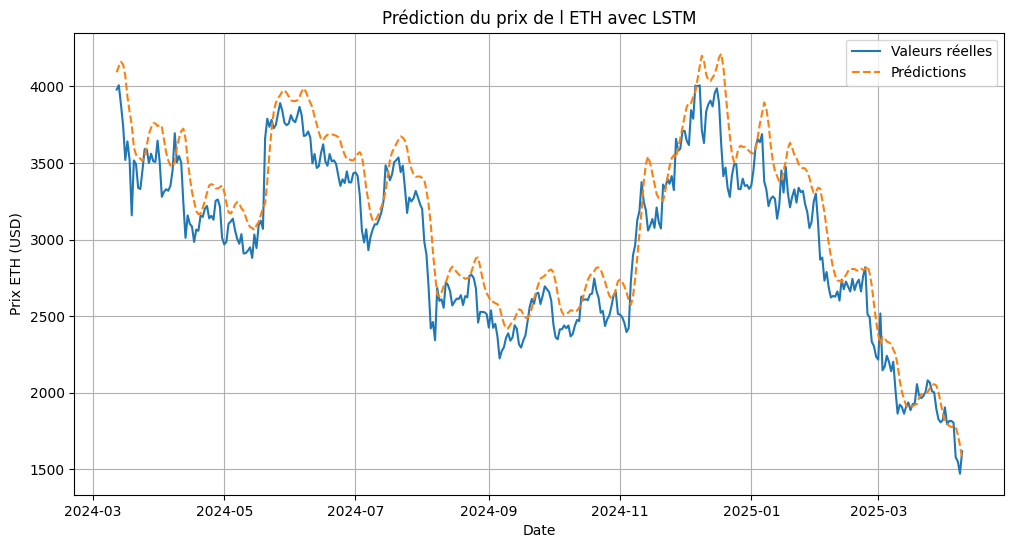

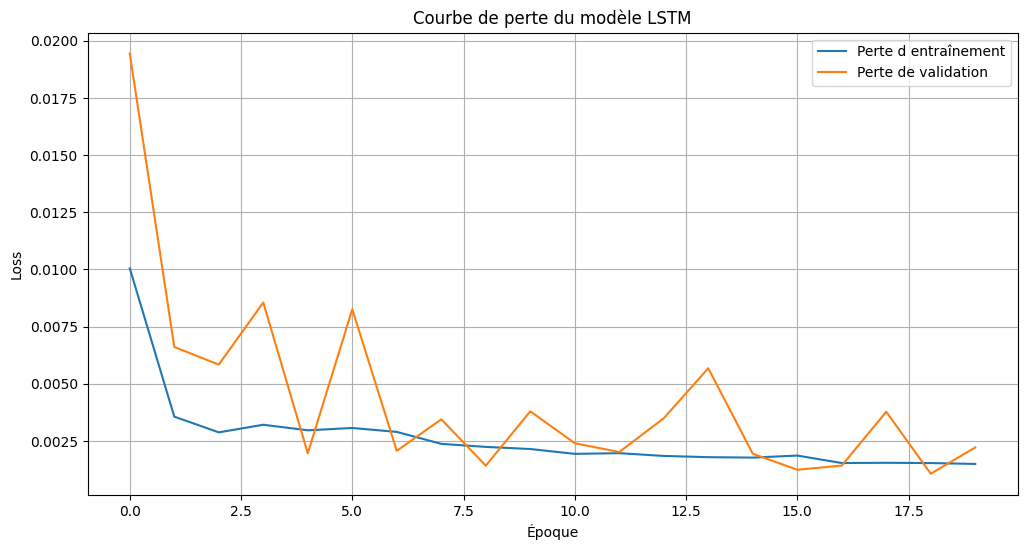

In [ ]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from datetime import datetime
import time


# Définition des timestamps
today = datetime.today()
end_timestamp = int(time.mktime(today.timetuple()))
start_timestamp = 1614556800  # Début de l'année 2021

# Collecte des données
bitcoin_data = collect_data_crypto_compare('BTC', start_timestamp, end_timestamp)
ethereum_data = collect_data_crypto_compare('ETH', start_timestamp, end_timestamp)

# 2. Prétraitement des données
def preprocess_data(btc_df, eth_df):
    df = pd.merge(btc_df[['time', 'close']], eth_df[['time', 'close']], on='time', suffixes=('_btc', '_eth'))
    df['btc_return'] = df['close_btc'].pct_change()
    df['eth_return'] = df['close_eth'].pct_change()
    df.dropna(inplace=True)
    return df

data = preprocess_data(bitcoin_data, ethereum_data)

# 3. Préparation des données pour le RNN
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['close_btc', 'close_eth']])

def create_sequences(data, seq_length=30):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length, 1])
    return np.array(X), np.array(y)

seq_length = 30
X, y = create_sequences(data_scaled, seq_length)
train_size = int(len(X) * 0.8)
X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]

# 4. Construction du modèle LSTM
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 2)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# 5. Entraînement du modèle
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# 6. Prédictions et évaluation
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(np.column_stack((np.zeros_like(y_pred), y_pred)))[:, 1]
y_test_rescaled = scaler.inverse_transform(np.column_stack((np.zeros_like(y_test), y_test)))[:, 1]


# 7. Visualisation des prédictions
plt.figure(figsize=(12, 6))
plt.plot(data['time'][-len(y_test):], y_test_rescaled, label='Valeurs réelles')
plt.plot(data['time'][-len(y_test):], y_pred_rescaled, label='Prédictions', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Prix ETH (USD)')
plt.title('Prédiction du prix de l ETH avec LSTM')
plt.legend()
plt.grid(True)
plt.show()

# 8. Visualisation de la perte
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Perte d entraînement')
plt.plot(history.history['val_loss'], label='Perte de validation')
plt.xlabel('Époque')
plt.ylabel('Loss')
plt.title('Courbe de perte du modèle LSTM')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Évaluation avec plusieurs métriques
rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

# Affichage
print("📊 Évaluation du modèle LSTM")
print(f"✅ RMSE : {rmse:.2f}")
print(f"✅ MAE  : {mae:.2f}")
print(f"✅ R²   : {r2:.4f}")


📊 Évaluation du modèle LSTM
✅ RMSE : 221.37
✅ MAE  : 178.37
✅ R²   : 0.8460


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0175 - mae: 0.0934 - val_loss: 0.0034 - val_mae: 0.0473
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0076 - mae: 0.0615 - val_loss: 0.0038 - val_mae: 0.0469
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0066 - mae: 0.0571 - val_loss: 0.0032 - val_mae: 0.0465
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0067 - mae: 0.0559 - val_loss: 0.0044 - val_mae: 0.0482
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0060 - mae: 0.0528 - val_loss: 0.0062 - val_mae: 0.0545
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0055 - mae: 0.0492 - val_loss: 0.0033 - val_mae: 0.0464
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0057 - mae: 0.0511 - val_loss: 0.0047 - val_mae: 0.0472
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0060 - mae: 0.0517 - val_loss: 0.0032 - val_mae: 0.0438
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0057 -

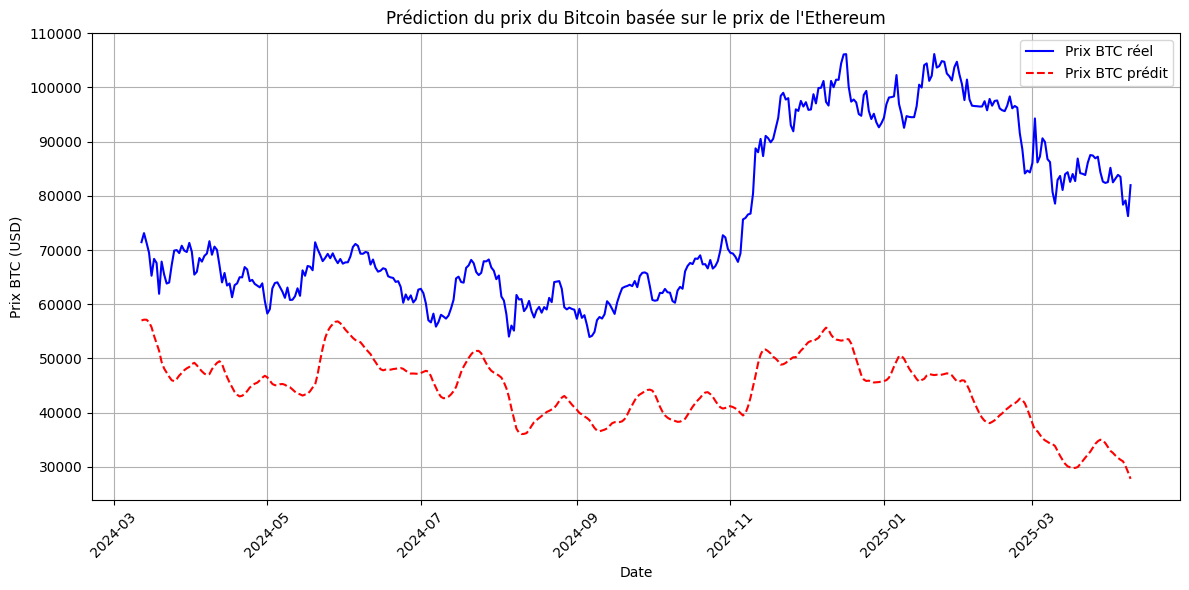

In [ ]:
import requests
import pandas as pd
import time
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


# Récupérer les données historiques de Bitcoin et Ethereum
btc_data = collect_data_crypto_compare('BTC', start_timestamp, end_timestamp)
eth_data = collect_data_crypto_compare('ETH', start_timestamp, end_timestamp)

# Fonction pour prétraiter les données
def preprocess_data(btc_df, eth_df):
    # Fusionner les données BTC et ETH sur la colonne 'time'
    df = pd.merge(btc_df[['time', 'close']], eth_df[['time', 'close']], on='time', suffixes=('_btc', '_eth'))

    # Conversion de la colonne time au format datetime si nécessaire
    if not pd.api.types.is_datetime64_any_dtype(df['time']):
        df['time'] = pd.to_datetime(df['time'])

    # Trier les données par ordre chronologique
    df = df.sort_values('time')

    # Calculer les retours journaliers pour BTC et ETH
    df['btc_return'] = df['close_btc'].pct_change()
    df['eth_return'] = df['close_eth'].pct_change()

    # Supprimer les lignes avec des valeurs NaN
    df.dropna(inplace=True)

    return df

# Fonction pour créer des séquences pour l'entraînement LSTM
def create_sequences(eth_prices, btc_prices, seq_length=30):
    X, y = [], []
    for i in range(len(eth_prices) - seq_length):
        # Utiliser les séquences de prix ETH comme features
        X.append(eth_prices[i:i+seq_length])
        # Utiliser le prix BTC comme cible
        y.append(btc_prices[i+seq_length])
    return np.array(X), np.array(y)

# Fonction pour construire le modèle LSTM
def build_model(seq_length, features=1):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(seq_length, features)),
        Dropout(0.2),
        LSTM(64, return_sequences=False),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)
    ])

    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

def main(bitcoin_data, ethereum_data):
    # Vérifier si les données sont valides
    if bitcoin_data is None or ethereum_data is None:
        print("Erreur : Les données n'ont pas pu être récupérées correctement.")
        return None  # Retourner None si les données sont invalides

    # Prétraitement des données
    data = preprocess_data(bitcoin_data, ethereum_data)

    # Création des scalers pour BTC et ETH séparément pour une meilleure mise à l'échelle
    eth_scaler = MinMaxScaler()
    btc_scaler = MinMaxScaler()

    # Mise à l'échelle des prix
    eth_scaled = eth_scaler.fit_transform(data[['close_eth']])
    btc_scaled = btc_scaler.fit_transform(data[['close_btc']])

    # Création des séquences
    seq_length = 30
    X, y = create_sequences(eth_scaled, btc_scaled, seq_length)

    # Reshape pour LSTM (samples, time steps, features)
    X = X.reshape((X.shape[0], X.shape[1], 1))

    # Division train/test (en respectant la chronologie)
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Construction et entraînement du modèle
    model = build_model(seq_length)

    # Utilisation d'early stopping pour éviter le surapprentissage
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1
    )

    # Prédictions
    y_pred = model.predict(X_test)

    # Inversions pour obtenir les prix réels
    y_test_btc = btc_scaler.inverse_transform(y_test)
    y_pred_btc = btc_scaler.inverse_transform(y_pred)

    # Évaluation du modèle
    mse = mean_squared_error(y_test_btc, y_pred_btc)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_btc, y_pred_btc)

    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.4f}")

    # Visualisation des prédictions
    plt.figure(figsize=(12, 6))

    # Récupérer les dates correspondantes aux données de test
    test_dates = data['time'].iloc[-len(y_test):].values

    plt.plot(test_dates, y_test_btc, label='Prix BTC réel', color='blue')
    plt.plot(test_dates, y_pred_btc, label='Prix BTC prédit', color='red', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Prix BTC (USD)')
    plt.title('Prédiction du prix du Bitcoin basée sur le prix de l\'Ethereum')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Retourner le modèle et les scalers
    return model, eth_scaler, btc_scaler

# Appeler la fonction principale avec les données récupérées
if btc_data is not None and eth_data is not None:
    model, eth_scaler, btc_scaler = main(btc_data, eth_data)
else:
    print("Les données n'ont pas pu être récupérées.")



Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0244 - mae: 0.1148 - val_loss: 0.0039 - val_mae: 0.0519
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0114 - mae: 0.0770 - val_loss: 0.0063 - val_mae: 0.0597
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0087 - mae: 0.0647 - val_loss: 0.0038 - val_mae: 0.0439
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0084 - mae: 0.0643 - val_loss: 0.0085 - val_mae: 0.0744
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0068 - mae: 0.0573 - val_loss: 0.0036 - val_mae: 0.0421
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0070 - mae: 0.0590 - val_loss: 0.0058 - val_mae: 0.0546
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0075 - mae: 0.0590 - val_loss: 0.0027 - val_mae: 0.0395
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0064 - mae: 0.0548 - val_loss: 0.0066 - val_mae: 0.0657
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0061 -

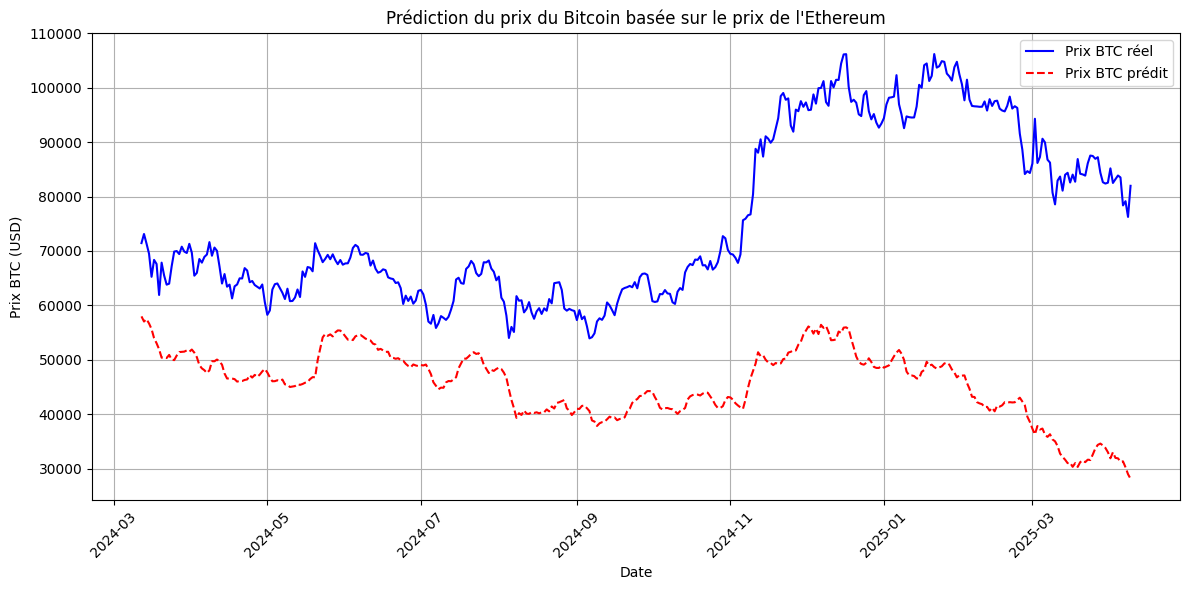

In [ ]:
# Fonction pour construire le modèle RNN Simple
def build_rnn_model(seq_length, features=1):
    model = Sequential([
        # Première couche RNN
        SimpleRNN(64, return_sequences=True, input_shape=(seq_length, features)),
        Dropout(0.2),
        # Deuxième couche RNN
        SimpleRNN(64, return_sequences=False),
        Dropout(0.2),
        # Couches entièrement connectées
        Dense(32, activation='relu'),
        Dense(1)
    ])

    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

def main_rnn(bitcoin_data, ethereum_data):
    # Vérifier si les données sont valides
    if bitcoin_data is None or ethereum_data is None:
        print("Erreur : Les données n'ont pas pu être récupérées correctement.")
        return None  # Retourner None si les données sont invalides

    # Prétraitement des données
    data = preprocess_data(bitcoin_data, ethereum_data)

    # Création des scalers pour BTC et ETH séparément pour une meilleure mise à l'échelle
    eth_scaler = MinMaxScaler()
    btc_scaler = MinMaxScaler()

    # Mise à l'échelle des prix
    eth_scaled = eth_scaler.fit_transform(data[['close_eth']])
    btc_scaled = btc_scaler.fit_transform(data[['close_btc']])

    # Création des séquences
    seq_length = 30
    X, y = create_sequences(eth_scaled, btc_scaled, seq_length)

    # Reshape pour RNN (samples, time steps, features)
    X = X.reshape((X.shape[0], X.shape[1], 1))

    # Division train/test (en respectant la chronologie)
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Construction et entraînement du modèle RNN
    model = build_rnn_model(seq_length)

    # Utilisation d'early stopping pour éviter le surapprentissage
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1
    )

    # Prédictions
    y_pred = model.predict(X_test)

    # Inversions pour obtenir les prix réels
    y_test_btc = btc_scaler.inverse_transform(y_test)
    y_pred_btc = btc_scaler.inverse_transform(y_pred)

    # Évaluation du modèle
    mse = mean_squared_error(y_test_btc, y_pred_btc)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_btc, y_pred_btc)

    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.4f}")

    # Visualisation des prédictions
    plt.figure(figsize=(12, 6))

    # Récupérer les dates correspondantes aux données de test
    test_dates = data['time'].iloc[-len(y_test):].values

    plt.plot(test_dates, y_test_btc, label='Prix BTC réel', color='blue')
    plt.plot(test_dates, y_pred_btc, label='Prix BTC prédit', color='red', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Prix BTC (USD)')
    plt.title('Prédiction du prix du Bitcoin basée sur le prix de l\'Ethereum')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Retourner le modèle et les scalers
    return model, eth_scaler, btc_scaler

# Appeler la fonction principale avec les données récupérées pour RNN
if btc_data is not None and eth_data is not None:
    model_rnn, eth_scaler_rnn, btc_scaler_rnn = main_rnn(btc_data, eth_data)
else:
    print("Les données n'ont pas pu être récupérées.")


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0188 - mae: 0.0976 - val_loss: 0.0040 - val_mae: 0.0454
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0055 - mae: 0.0488 - val_loss: 0.0034 - val_mae: 0.0456
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0067 - mae: 0.0536 - val_loss: 0.0073 - val_mae: 0.0621
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0072 - mae: 0.0576 - val_loss: 0.0037 - val_mae: 0.0469
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0062 - mae: 0.0527 - val_loss: 0.0030 - val_mae: 0.0458
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0061 - mae: 0.0527 - val_loss: 0.0044 - val_mae: 0.0473
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0053 - mae: 0.0478 - val_loss: 0.0032 - val_mae: 0.0456
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0061 - mae: 0.0515 - val_loss: 0.0030 - val_mae: 0.0465
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0062 -

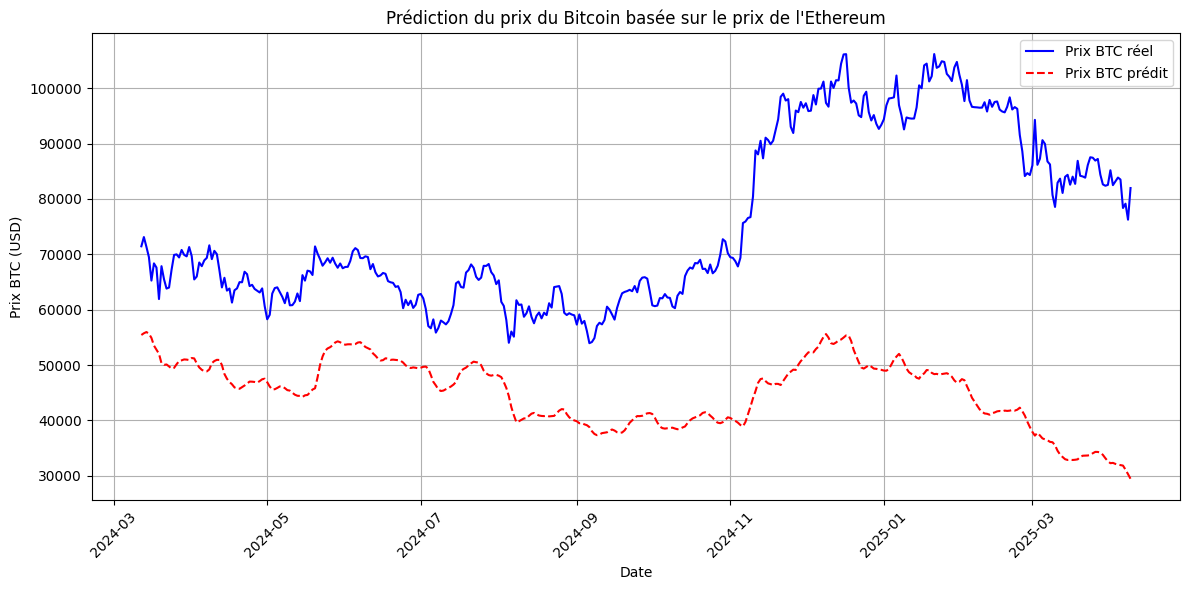

In [ ]:

# Fonction pour construire le modèle GRU
def build_gru_model(seq_length, features=1):
    model = Sequential([
        # Première couche GRU
        GRU(64, return_sequences=True, input_shape=(seq_length, features)),
        Dropout(0.2),
        # Deuxième couche GRU
        GRU(64, return_sequences=False),
        Dropout(0.2),
        # Couches entièrement connectées
        Dense(32, activation='relu'),
        Dense(1)
    ])

    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

def main_gru(bitcoin_data, ethereum_data):
    # Vérifier si les données sont valides
    if bitcoin_data is None or ethereum_data is None:
        print("Erreur : Les données n'ont pas pu être récupérées correctement.")
        return None  # Retourner None si les données sont invalides

    # Prétraitement des données
    data = preprocess_data(bitcoin_data, ethereum_data)

    # Création des scalers pour BTC et ETH séparément pour une meilleure mise à l'échelle
    eth_scaler = MinMaxScaler()
    btc_scaler = MinMaxScaler()

    # Mise à l'échelle des prix
    eth_scaled = eth_scaler.fit_transform(data[['close_eth']])
    btc_scaled = btc_scaler.fit_transform(data[['close_btc']])

    # Création des séquences
    seq_length = 30
    X, y = create_sequences(eth_scaled, btc_scaled, seq_length)

    # Reshape pour GRU (samples, time steps, features)
    X = X.reshape((X.shape[0], X.shape[1], 1))

    # Division train/test (en respectant la chronologie)
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Construction et entraînement du modèle GRU
    model = build_gru_model(seq_length)

    # Utilisation d'early stopping pour éviter le surapprentissage
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1
    )

    # Prédictions
    y_pred = model.predict(X_test)

    # Inversions pour obtenir les prix réels
    y_test_btc = btc_scaler.inverse_transform(y_test)
    y_pred_btc = btc_scaler.inverse_transform(y_pred)

    # Évaluation du modèle
    mse = mean_squared_error(y_test_btc, y_pred_btc)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_btc, y_pred_btc)

    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.4f}")

    # Visualisation des prédictions
    plt.figure(figsize=(12, 6))

    # Récupérer les dates correspondantes aux données de test
    test_dates = data['time'].iloc[-len(y_test):].values

    plt.plot(test_dates, y_test_btc, label='Prix BTC réel', color='blue')
    plt.plot(test_dates, y_pred_btc, label='Prix BTC prédit', color='red', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Prix BTC (USD)')
    plt.title('Prédiction du prix du Bitcoin basée sur le prix de l\'Ethereum')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Retourner le modèle et les scalers
    return model, eth_scaler, btc_scaler

# Appeler la fonction principale avec les données récupérées pour GRU
if btc_data is not None and eth_data is not None:
    model_gru, eth_scaler_gru, btc_scaler_gru = main_gru(btc_data, eth_data)
else:
    print("Les données n'ont pas pu être récupérées.")


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0256 - mae: 0.1067 - val_loss: 6.6817e-04 - val_mae: 0.0199
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0022 - mae: 0.0322 - val_loss: 7.9223e-04 - val_mae: 0.0178
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0016 - mae: 0.0264 - val_loss: 0.0014 - val_mae: 0.0269
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0011 - mae: 0.0226 - val_loss: 0.0011 - val_mae: 0.0219
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0013 - mae: 0.0233 - val_loss: 7.9630e-04 - val_mae: 0.0176
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0012 - mae: 0.0236 - val_loss: 6.1990e-04 - val_mae: 0.0151
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0012 - mae: 0.0237 - val_loss: 0.0026 - val_mae: 0.0428
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0011 - mae: 0.0233 - val_loss: 4.7650e-04 - val_mae: 0.0140
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/s

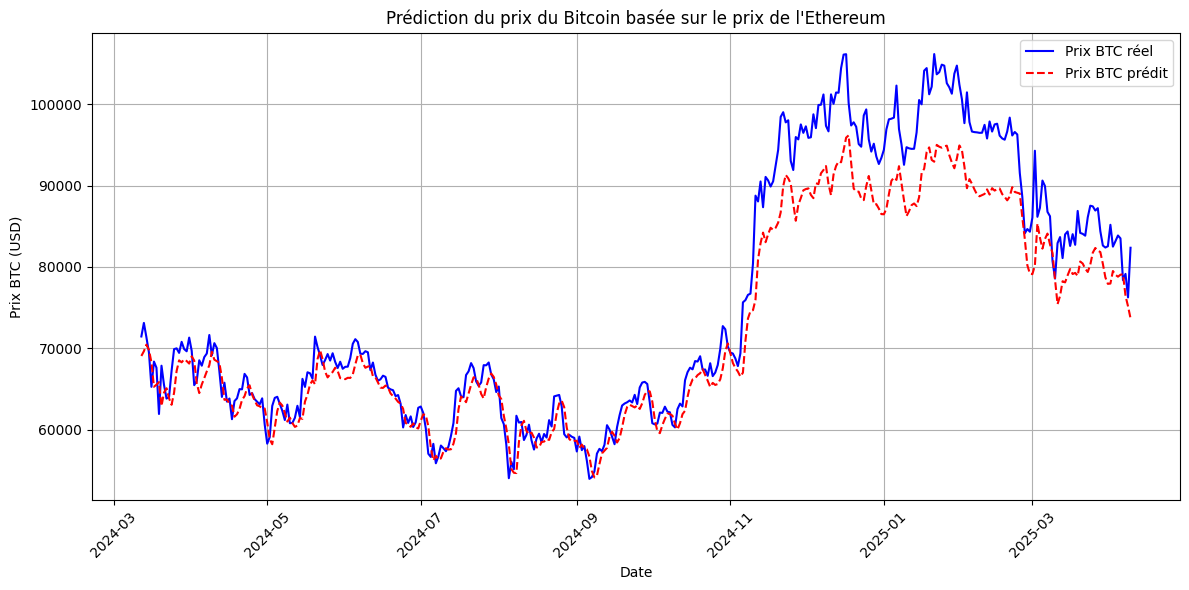

In [ ]:
import requests
import pandas as pd
import time
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Fonction pour récupérer les données historiques de CryptoCompare
def collect_data_crypto_compare(crypto_symbol, start_timestamp, end_timestamp):
    url = f'https://min-api.cryptocompare.com/data/v2/histoday'
    params = {
        'fsym': crypto_symbol,  # Symbole de la cryptomonnaie (BTC ou ETH)
        'tsym': 'USD',  # Devise de comparaison
        'limit': 2000,  # Limite des jours à récupérer
        'toTs': end_timestamp,  # Timestamp de fin
        'extraParams': 'crypto_prediction'  # Paramètre optionnel pour l'identification de l'application
    }
    response = requests.get(url, params=params)

    if response.status_code == 200:
        data = response.json()['Data']['Data']
        df = pd.DataFrame(data)

        # Convertir les timestamps en dates lisibles
        df['time'] = pd.to_datetime(df['time'], unit='s')

        return df
    else:
        print(f"Erreur lors de la récupération des données: {response.status_code}")
        return None

# Fonction pour prétraiter les données
def preprocess_data(btc_df, eth_df):
    # Fusionner les données BTC et ETH sur la colonne 'time'
    df = pd.merge(btc_df[['time', 'close']], eth_df[['time', 'close']], on='time', suffixes=('_btc', '_eth'))

    # Conversion de la colonne time au format datetime si nécessaire
    if not pd.api.types.is_datetime64_any_dtype(df['time']):
        df['time'] = pd.to_datetime(df['time'])

    # Trier les données par ordre chronologique
    df = df.sort_values('time')

    # Calculer les retours journaliers pour BTC et ETH
    df['btc_return'] = df['close_btc'].pct_change()
    df['eth_return'] = df['close_eth'].pct_change()

    # Supprimer les lignes avec des valeurs NaN
    df.dropna(inplace=True)

    return df

# Fonction pour créer des séquences pour l'entraînement LSTM
def create_sequences(eth_prices, btc_prices, seq_length=30):
    X, y = [], []
    for i in range(len(eth_prices) - seq_length):
        # Utiliser les séquences de prix ETH et BTC comme features
        X.append(np.column_stack((eth_prices[i:i+seq_length], btc_prices[i:i+seq_length])))
        # Utiliser le prix BTC comme cible
        y.append(btc_prices[i+seq_length])
    return np.array(X), np.array(y)

# Fonction pour construire le modèle LSTM
def build_model(seq_length, features=2):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(seq_length, features)),
        Dropout(0.2),
        LSTM(64, return_sequences=False),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)
    ])

    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

def main(bitcoin_data, ethereum_data):
    # Vérifier si les données sont valides
    if bitcoin_data is None or ethereum_data is None:
        print("Erreur : Les données n'ont pas pu être récupérées correctement.")
        return None  # Retourner None si les données sont invalides

    # Prétraitement des données
    data = preprocess_data(bitcoin_data, ethereum_data)

    # Création des scalers pour BTC et ETH séparément pour une meilleure mise à l'échelle
    eth_scaler = MinMaxScaler()
    btc_scaler = MinMaxScaler()

    # Mise à l'échelle des prix
    eth_scaled = eth_scaler.fit_transform(data[['close_eth']])
    btc_scaled = btc_scaler.fit_transform(data[['close_btc']])

    # Création des séquences
    seq_length = 30
    X, y = create_sequences(eth_scaled, btc_scaled, seq_length)

    # Reshape pour LSTM (samples, time steps, features)
    X = X.reshape((X.shape[0], X.shape[1], 2))  # Chaque séquence a 2 caractéristiques (ETH et BTC)

    # Division train/test (en respectant la chronologie)
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Construction et entraînement du modèle
    model = build_model(seq_length)

    # Utilisation d'early stopping pour éviter le surapprentissage
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1
    )

    # Prédictions
    y_pred = model.predict(X_test)

    # Inversions pour obtenir les prix réels
    y_test_btc = btc_scaler.inverse_transform(y_test)
    y_pred_btc = btc_scaler.inverse_transform(y_pred)

    # Évaluation du modèle
    mse = mean_squared_error(y_test_btc, y_pred_btc)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_btc, y_pred_btc)

    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.4f}")

    # Visualisation des prédictions
    plt.figure(figsize=(12, 6))

    # Récupérer les dates correspondantes aux données de test
    test_dates = data['time'].iloc[-len(y_test):].values

    plt.plot(test_dates, y_test_btc, label='Prix BTC réel', color='blue')
    plt.plot(test_dates, y_pred_btc, label='Prix BTC prédit', color='red', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Prix BTC (USD)')
    plt.title('Prédiction du prix du Bitcoin basée sur le prix de l\'Ethereum')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Retourner le modèle et les scalers
    return model, eth_scaler, btc_scaler

# Récupérer les données historiques pour Bitcoin et Ethereum
today = datetime.today()
end_timestamp = int(time.mktime(today.timetuple()))
start_timestamp = 1614556800  # Exemple : début de l'année 2021

btc_data = collect_data_crypto_compare('BTC', start_timestamp, end_timestamp)
eth_data = collect_data_crypto_compare('ETH', start_timestamp, end_timestamp)

# Appeler la fonction principale avec les données récupérées
if btc_data is not None and eth_data is not None:
    model, eth_scaler, btc_scaler = main(btc_data, eth_data)
else:
    print("Les données n'ont pas pu être récupérées.")


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0192 - mae: 0.0936 - val_loss: 0.0013 - val_mae: 0.0274
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0012 - mae: 0.0240 - val_loss: 4.0720e-04 - val_mae: 0.0151
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 8.5959e-04 - mae: 0.0198 - val_loss: 0.0010 - val_mae: 0.0283
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 8.3728e-04 - mae: 0.0203 - val_loss: 2.0861e-04 - val_mae: 0.0103
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 9.4886e-04 - mae: 0.0207 - val_loss: 4.7829e-04 - val_mae: 0.0161
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 8.4322e-04 - mae: 0.0191 - val_loss: 0.0019 - val_mae: 0.0399
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 7.8220e-04 - mae: 0.0197 - val_loss: 2.7019e-04 - val_mae: 0.0101
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 7.0111e-04 - mae: 0.0185 - val_loss: 6.0784e-04 - val_mae: 0.0195
Epoch 9/100
40/40 ━━━━━━

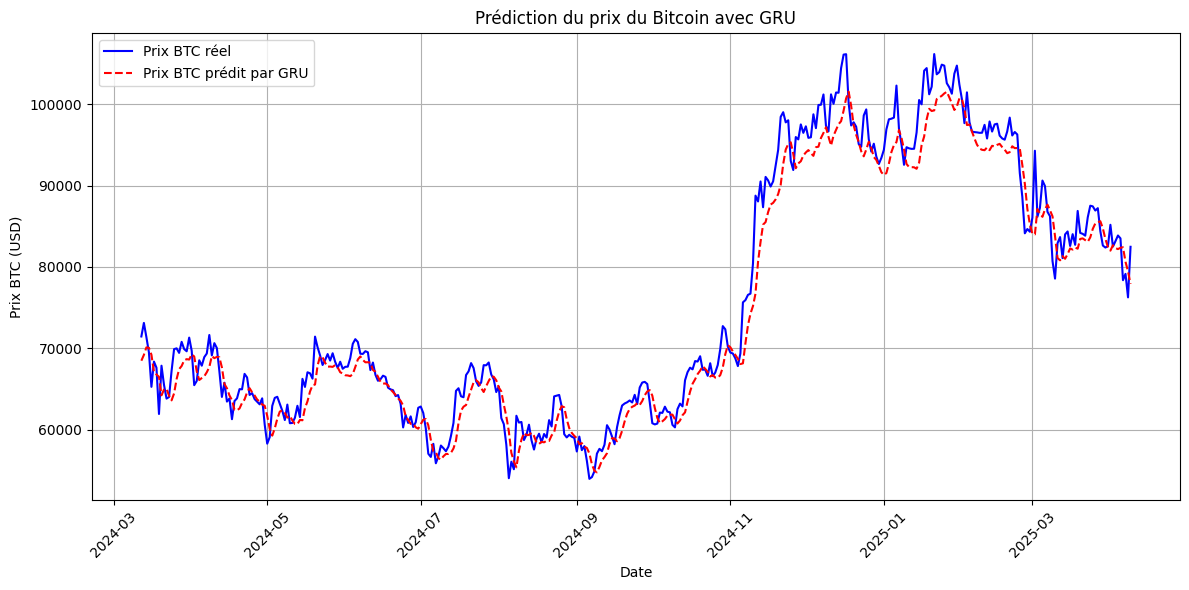

In [ ]:
import requests
import pandas as pd
import time
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Fonction pour récupérer les données historiques de CryptoCompare
def collect_data_crypto_compare(crypto_symbol, start_timestamp, end_timestamp):
    url = f'https://min-api.cryptocompare.com/data/v2/histoday'
    params = {
        'fsym': crypto_symbol,  # Symbole de la cryptomonnaie (BTC ou ETH)
        'tsym': 'USD',  # Devise de comparaison
        'limit': 2000,  # Limite des jours à récupérer
        'toTs': end_timestamp,  # Timestamp de fin
        'extraParams': 'crypto_prediction'  # Paramètre optionnel pour l'identification de l'application
    }
    response = requests.get(url, params=params)

    if response.status_code == 200:
        data = response.json()['Data']['Data']
        df = pd.DataFrame(data)

        # Convertir les timestamps en dates lisibles
        df['time'] = pd.to_datetime(df['time'], unit='s')

        return df
    else:
        print(f"Erreur lors de la récupération des données: {response.status_code}")
        return None

# Fonction pour prétraiter les données
def preprocess_data(btc_df, eth_df):
    # Fusionner les données BTC et ETH sur la colonne 'time'
    df = pd.merge(btc_df[['time', 'close']], eth_df[['time', 'close']], on='time', suffixes=('_btc', '_eth'))

    # Conversion de la colonne time au format datetime si nécessaire
    if not pd.api.types.is_datetime64_any_dtype(df['time']):
        df['time'] = pd.to_datetime(df['time'])

    # Trier les données par ordre chronologique
    df = df.sort_values('time')

    # Calculer les retours journaliers pour BTC et ETH
    df['btc_return'] = df['close_btc'].pct_change()
    df['eth_return'] = df['close_eth'].pct_change()

    # Supprimer les lignes avec des valeurs NaN
    df.dropna(inplace=True)

    return df

# Fonction pour créer des séquences pour l'entraînement GRU
def create_sequences(eth_prices, btc_prices, seq_length=30):
    X, y = [], []
    for i in range(len(eth_prices) - seq_length):
        # Utiliser les séquences de prix ETH et BTC comme features
        X.append(np.column_stack((eth_prices[i:i+seq_length], btc_prices[i:i+seq_length])))
        # Utiliser le prix BTC comme cible
        y.append(btc_prices[i+seq_length])
    return np.array(X), np.array(y)

# Fonction pour construire le modèle GRU
def build_gru_model(seq_length, features=2):
    model = Sequential([
        GRU(64, return_sequences=True, input_shape=(seq_length, features)),
        Dropout(0.2),
        GRU(64, return_sequences=False),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)
    ])

    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

def main(bitcoin_data, ethereum_data):
    # Vérifier si les données sont valides
    if bitcoin_data is None or ethereum_data is None:
        print("Erreur : Les données n'ont pas pu être récupérées correctement.")
        return None  # Retourner None si les données sont invalides

    # Prétraitement des données
    data = preprocess_data(bitcoin_data, ethereum_data)

    # Création des scalers pour BTC et ETH séparément pour une meilleure mise à l'échelle
    eth_scaler = MinMaxScaler()
    btc_scaler = MinMaxScaler()

    # Mise à l'échelle des prix
    eth_scaled = eth_scaler.fit_transform(data[['close_eth']])
    btc_scaled = btc_scaler.fit_transform(data[['close_btc']])

    # Création des séquences
    seq_length = 30
    X, y = create_sequences(eth_scaled, btc_scaled, seq_length)

    # Reshape pour GRU (samples, time steps, features)
    X = X.reshape((X.shape[0], X.shape[1], 2))  # Chaque séquence a 2 caractéristiques (ETH et BTC)

    # Division train/test (en respectant la chronologie)
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Construction et entraînement du modèle GRU
    gru_model = build_gru_model(seq_length)

    # Utilisation d'early stopping pour éviter le surapprentissage
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    gru_history = gru_model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1
    )

    # Prédictions avec le modèle GRU
    gru_pred = gru_model.predict(X_test)

    # Inversions pour obtenir les prix réels
    y_test_btc = btc_scaler.inverse_transform(y_test)
    gru_pred_btc = btc_scaler.inverse_transform(gru_pred)

    # Évaluation du modèle GRU
    gru_mse = mean_squared_error(y_test_btc, gru_pred_btc)
    gru_rmse = np.sqrt(gru_mse)
    gru_r2 = r2_score(y_test_btc, gru_pred_btc)

    print(f"GRU - MSE: {gru_mse:.2f}")
    print(f"GRU - RMSE: {gru_rmse:.2f}")
    print(f"GRU - R²: {gru_r2:.4f}")

    # Visualisation des prédictions
    plt.figure(figsize=(12, 6))

    # Récupérer les dates correspondantes aux données de test
    test_dates = data['time'].iloc[-len(y_test):].values

    plt.plot(test_dates, y_test_btc, label='Prix BTC réel', color='blue')
    plt.plot(test_dates, gru_pred_btc, label='Prix BTC prédit par GRU', color='red', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Prix BTC (USD)')
    plt.title('Prédiction du prix du Bitcoin avec GRU')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Retourner le modèle et les scalers
    return gru_model, eth_scaler, btc_scaler

# Récupérer les données historiques pour Bitcoin et Ethereum
today = datetime.today()
end_timestamp = int(time.mktime(today.timetuple()))
start_timestamp = 1614556800  # Exemple : début de l'année 2021

btc_data = collect_data_crypto_compare('BTC', start_timestamp, end_timestamp)
eth_data = collect_data_crypto_compare('ETH', start_timestamp, end_timestamp)

# Appeler la fonction principale avec les données récupérées
if btc_data is not None and eth_data is not None:
    gru_model, eth_scaler, btc_scaler = main(btc_data, eth_data)
else:
    print("Les données n'ont pas pu être récupérées.")


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0430 - mae: 0.1469 - val_loss: 0.0076 - val_mae: 0.0697
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0065 - mae: 0.0600 - val_loss: 0.0060 - val_mae: 0.0659
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0056 - mae: 0.0529 - val_loss: 0.0049 - val_mae: 0.0550
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0036 - mae: 0.0421 - val_loss: 0.0028 - val_mae: 0.0441
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0030 - mae: 0.0391 - val_loss: 0.0016 - val_mae: 0.0268
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0026 - mae: 0.0349 - val_loss: 0.0018 - val_mae: 0.0311
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0018 - mae: 0.0305 - val_loss: 0.0013 - val_mae: 0.0277
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0020 - mae: 0.0310 - val_loss: 0.0017 - val_mae: 0.0326
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0017 -

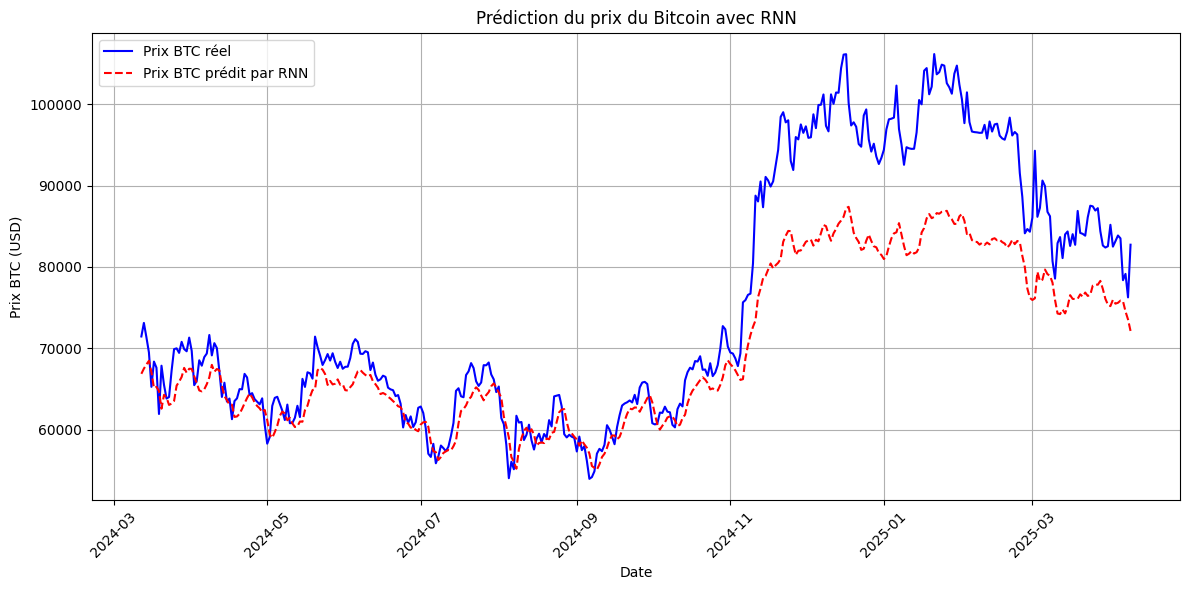

In [ ]:
import requests
import pandas as pd
import time
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Fonction pour récupérer les données historiques de CryptoCompare
def collect_data_crypto_compare(crypto_symbol, start_timestamp, end_timestamp):
    url = f'https://min-api.cryptocompare.com/data/v2/histoday'
    params = {
        'fsym': crypto_symbol,  # Symbole de la cryptomonnaie (BTC ou ETH)
        'tsym': 'USD',  # Devise de comparaison
        'limit': 2000,  # Limite des jours à récupérer
        'toTs': end_timestamp,  # Timestamp de fin
        'extraParams': 'crypto_prediction'  # Paramètre optionnel pour l'identification de l'application
    }
    response = requests.get(url, params=params)

    if response.status_code == 200:
        data = response.json()['Data']['Data']
        df = pd.DataFrame(data)

        # Convertir les timestamps en dates lisibles
        df['time'] = pd.to_datetime(df['time'], unit='s')

        return df
    else:
        print(f"Erreur lors de la récupération des données: {response.status_code}")
        return None

# Fonction pour prétraiter les données
def preprocess_data(btc_df, eth_df):
    # Fusionner les données BTC et ETH sur la colonne 'time'
    df = pd.merge(btc_df[['time', 'close']], eth_df[['time', 'close']], on='time', suffixes=('_btc', '_eth'))

    # Conversion de la colonne time au format datetime si nécessaire
    if not pd.api.types.is_datetime64_any_dtype(df['time']):
        df['time'] = pd.to_datetime(df['time'])

    # Trier les données par ordre chronologique
    df = df.sort_values('time')

    # Calculer les retours journaliers pour BTC et ETH
    df['btc_return'] = df['close_btc'].pct_change()
    df['eth_return'] = df['close_eth'].pct_change()

    # Supprimer les lignes avec des valeurs NaN
    df.dropna(inplace=True)

    return df

# Fonction pour créer des séquences pour l'entraînement RNN
def create_sequences(eth_prices, btc_prices, seq_length=30):
    X, y = [], []
    for i in range(len(eth_prices) - seq_length):
        # Utiliser les séquences de prix ETH et BTC comme features
        X.append(np.column_stack((eth_prices[i:i+seq_length], btc_prices[i:i+seq_length])))
        # Utiliser le prix BTC comme cible
        y.append(btc_prices[i+seq_length])
    return np.array(X), np.array(y)

# Fonction pour construire le modèle RNN
def build_rnn_model(seq_length, features=2):
    model = Sequential([
        SimpleRNN(64, return_sequences=True, input_shape=(seq_length, features)),
        Dropout(0.2),
        SimpleRNN(64, return_sequences=False),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)
    ])

    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

def main(bitcoin_data, ethereum_data):
    # Vérifier si les données sont valides
    if bitcoin_data is None or ethereum_data is None:
        print("Erreur : Les données n'ont pas pu être récupérées correctement.")
        return None  # Retourner None si les données sont invalides

    # Prétraitement des données
    data = preprocess_data(bitcoin_data, ethereum_data)

    # Création des scalers pour BTC et ETH séparément pour une meilleure mise à l'échelle
    eth_scaler = MinMaxScaler()
    btc_scaler = MinMaxScaler()

    # Mise à l'échelle des prix
    eth_scaled = eth_scaler.fit_transform(data[['close_eth']])
    btc_scaled = btc_scaler.fit_transform(data[['close_btc']])

    # Création des séquences
    seq_length = 30
    X, y = create_sequences(eth_scaled, btc_scaled, seq_length)

    # Reshape pour RNN (samples, time steps, features)
    X = X.reshape((X.shape[0], X.shape[1], 2))  # Chaque séquence a 2 caractéristiques (ETH et BTC)

    # Division train/test (en respectant la chronologie)
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Construction et entraînement du modèle RNN
    rnn_model = build_rnn_model(seq_length)

    # Utilisation d'early stopping pour éviter le surapprentissage
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    rnn_history = rnn_model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1
    )

    # Prédictions avec le modèle RNN
    rnn_pred = rnn_model.predict(X_test)

    # Inversions pour obtenir les prix réels
    y_test_btc = btc_scaler.inverse_transform(y_test)
    rnn_pred_btc = btc_scaler.inverse_transform(rnn_pred)

    # Évaluation du modèle RNN
    rnn_mse = mean_squared_error(y_test_btc, rnn_pred_btc)
    rnn_rmse = np.sqrt(rnn_mse)
    rnn_r2 = r2_score(y_test_btc, rnn_pred_btc)

    print(f"RNN - MSE: {rnn_mse:.2f}")
    print(f"RNN - RMSE: {rnn_rmse:.2f}")
    print(f"RNN - R²: {rnn_r2:.4f}")

    # Visualisation des prédictions
    plt.figure(figsize=(12, 6))

    # Récupérer les dates correspondantes aux données de test
    test_dates = data['time'].iloc[-len(y_test):].values

    plt.plot(test_dates, y_test_btc, label='Prix BTC réel', color='blue')
    plt.plot(test_dates, rnn_pred_btc, label='Prix BTC prédit par RNN', color='red', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Prix BTC (USD)')
    plt.title('Prédiction du prix du Bitcoin avec RNN')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Retourner le modèle et les scalers
    return rnn_model, eth_scaler, btc_scaler

# Récupérer les données historiques pour Bitcoin et Ethereum
today = datetime.today()
end_timestamp = int(time.mktime(today.timetuple()))
start_timestamp = 1614556800  # Exemple : début de l'année 2021

btc_data = collect_data_crypto_compare('BTC', start_timestamp, end_timestamp)
eth_data = collect_data_crypto_compare('ETH', start_timestamp, end_timestamp)

# Appeler la fonction principale avec les données récupérées
if btc_data is not None and eth_data is not None:
    rnn_model, eth_scaler, btc_scaler = main(btc_data, eth_data)
else:
    print("Les données n'ont pas pu être récupérées.")
